<img src="logo-cefet.png" width="300">

<h1> PPCIC Dissertação - 2021/2022
    <br>
    <br>
    DETECÇÃO DE EVENTOS ADVERSOS ATRAVÉS DO TWITTER UTILIZANDO O METAMAP PARA O PORTUGUÊS DO BRASIL </h1>
</br>

<h2> Matéria: CIC1229 - TÓPICOS ESPECIAIS EM ALGORITMOS </h2>
<h2> Aluno: Perciliano </h2>
<h2> Orientadora: Kele Belloze </h2>
<h3> Data: 31/05/2022 </h3>

---

**Autor: Luiz Perciliano** - 
***luiz.perciliano@eic.cefet-rj.br***


<b>Dados da pesquisa na base SCOPUS e PubMed - 436 documentos para análise</b>
<br>
Num | Artigo | Qtde
---|---|---
1 | Bom | 52
2 | Execelente | 16

Tabela de Artigos

<br>

**Feito**
1. [x] Enviar mail Metamap
1. [x] Criado projeto no git para Fork e acompanhamento do Will
1. [x] Nova forma de busca no PubMed, exemplo de query na ferramenta:
<br>
```
"natural language processing"[Title/Abstract] AND ("adverse drug reaction"[Title/Abstract] OR "adverse drug event"[Title/Abstract] OR ("pharmacovigilance"[MeSH Terms] OR "pharmacovigilance"[Title/Abstract]) OR "metamap"[Title/Abstract])
```
<br>
ao invés de 252, viria 159


**A Fazer**

1. [ ] 6+ - Há um documento que não foi necessário baixar PDF, verificar este
1. [ ] Ler Introduções de 70 documentos: Excelente (16) Bom (52)
1. [ ] Analisr biblioteca Python do Metamap
1. [ ] Reinstalar do zero o Metamap
1. [ ] Artigos sem abstract serão deixados por último


---

[Projeto no GitHub](https://github.com/LuizPerciliano/Evento-Adverso-com-Metamap-e-Twitter-com-Portugues-Brasil)

[Site da dissertação](https://www.overleaf.com/read/rtybccmfvfr7)

[Manual de instalação do Metamap DFB 2021](https://www.overleaf.com/read/jsyhtqwwgccz)

<h2> PESQUISA RECENTE - MAIO DE 2022 </h2>
<br>
((("natural language processing"AND ("adverse drug reaction"OR "adverse drug event"OR pharmacovigilance OR metamap))))
<br>
<b>Base SCOPUS antes = 458 | atual = 541 ()</b>
<br><br>
``` "natural language processing"[Title/Abstract] AND ("adverse drug reaction"[Title/Abstract] OR "adverse drug event"[Title/Abstract] OR ("pharmacovigilance"[MeSH Terms] OR "pharmacovigilance"[Title/Abstract]) OR "metamap"[Title/Abstract]) ```
<br>
<b>Base PUBMED antes = 252| atual = 289*. Com ajuste na string de busca ficou em 188 resultados</b>
<br><br>

<b>Dados da pesquisa na base SCOPUS e PubMed - 436 documentos para análise antes</b>
<br>
Num | Artigo | Qtde
---|---|---
1 | Bom | 52
2 | Execelente | 16

Tabela de Artigos

<br>

**Tarefas**
1. [ ] Atualizar projeto/programa de análise de artigos (.py)
1. [x] Enviar mail Metamap (Will, sem respostas há meses)
1. [ ] Atualizar projeto no git
1. [x] Implementar nova forma de busca no PubMed, exemplo de query na ferramenta:
<br>
```
"natural language processing"[Title/Abstract] AND ("adverse drug reaction"[Title/Abstract] OR "adverse drug event"[Title/Abstract] OR ("pharmacovigilance"[MeSH Terms] OR "pharmacovigilance"[Title/Abstract]) OR "metamap"[Title/Abstract])
```
<br>
ao invés de 252, viria 159
1. [ ] Analisar biblioteca Python do Metamap
1. [ ] Melhorar busca de massa de dados no Twitter com o Knime
1. [ ] Ajustar / rodar MetaMap com nova massa de dados
1. [ ] Artigos sem abstract serão deixados por último

---

# Preparar Infraesrtutura

In [1]:
print(f'Importar as bibliotecas necessárias e mapear a pasta do projeto.')
import os, re
import sys
import pandas as pd
import datetime
#import numpy as np
import seaborn as sns

import nltk
#nltk.download()
from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

from google_trans_new import google_translator  

Importar as bibliotecas necessárias e mapear a pasta do projeto.


In [2]:
data_inicio = pd.Timestamp.now()
print(f'Iniciando o programa em: {data_inicio}')

Iniciando o programa em: 2022-06-08 21:20:14.246764


In [3]:
print(f'Lista do conteúdo da pasta ...')
os.listdir(os.path.join('..','data'))

Lista do conteúdo da pasta ...


['base-qualis-06-06-2021.xlsx',
 'bases_filtradas_traduzida-02-05-2022.xlsx',
 'bases_filtradas_traduzida-26-09-2021.xlsx',
 'bases_filtradas_traduzida-27-06-2021.xlsx',
 'pubmed-csv-naturallan-set-2022.csv',
 'pubmed.csv',
 'PubMed_Timeline_Results_by_Year-10-06-2021.csv',
 'requiremets.txt',
 'resultado_pubmed.xlsx',
 'resultado_scopus-19-06-2021 - Copia.xlsx',
 'resultado_scopus-19-06-2021.xlsx',
 'scopus-12-06-2021-luciana.csv',
 'scopus-31-05-2022.csv',
 'scopus-94 - Copia.csv',
 'scopus-94-clean.csv',
 'scopus-94-clean.xlsx',
 'scopus-94.csv',
 'scopus.csv',
 'stop_word_projeto.csv',
 'stop_word_pt.csv']

In [4]:
pd.set_option("max_colwidth", 200)

# Carga - Base Qualis

# Carga - Base Scopus

In [6]:
print('Visualização do dataframe carregado da base scopus.')
arquivo_base_scopus = os.path.join('../data','scopus-31-05-2022.csv')
raw_data_scopus = pd.read_csv(arquivo_base_scopus, sep=",", delimiter=None, encoding='utf-8')
raw_data_scopus.head(3)

Visualização do dataframe carregado da base scopus.


,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Aronson A.R.,17933416200;,Effective mapping of biomedical text to the UMLS Metathesaurus: the MetaMap program.,2001,Proceedings / AMIA ... Annual Symposium. AMIA Symposium,NaN,NaN,NaN,17,21,...,NaN,NaN,11825149.0,English,Proc AMIA Symp,Article,Final,NaN,Scopus,2-s2.0-0035752429
1,"Kuhn M., Letunic I., Jensen L.J., Bork P.",35345083400;6602771600;35548941900;7103061421;,The SIDER database of drugs and side effects,2016,Nucleic Acids Research,44,D1,NaN,D1075,D1079,...,NaN,NARHA,26481350.0,English,Nucleic Acids Res.,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-84979503522
2,"Nikfarjam A., Sarker A., O'Connor k., Ginn R., Gonzalez G.",36069663700;36976315000;56596185000;56596524300;56749066000;,Pharmacovigilance from social media: Mining adverse drug reaction mentions using sequence labeling with word embedding cluster features,2015,Journal of the American Medical Informatics Association,22,3,NaN,671,681,...,NaN,JAMAF,25755127.0,English,J. Am. Med. Informatics Assoc.,Article,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-84927943705


## Análise base SCOPUS

In [7]:
print('Verificando tipos e se tem dados nulos')
raw_data_scopus.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        541 non-null    object 
 1   Author(s) ID                   541 non-null    object 
 2   Title                          541 non-null    object 
 3   Year                           541 non-null    int64  
 4   Source title                   541 non-null    object 
 5   Volume                         454 non-null    object 
 6   Issue                          236 non-null    object 
 7   Art. No.                       145 non-null    object 
 8   Page start                     407 non-null    object 
 9   Page end                       396 non-null    object 
 10  Page count                     3 non-null      float64
 11  Cited by                       454 non-null    float64
 12  DOI        

In [8]:
raw_data_scopus.nunique()

Authors                          525
Author(s) ID                     521
Title                            539
Year                              23
Source title                     196
Volume                           188
Issue                             37
Art. No.                         141
Page start                       316
Page end                         325
Page count                         3
Cited by                          81
DOI                              442
Link                             541
Affiliations                     528
Authors with affiliations        536
Abstract                         530
Author Keywords                  375
Index Keywords                   492
Molecular Sequence Numbers         0
Chemicals/CAS                     85
Tradenames                        18
Manufacturers                      2
Funding Details                  259
Funding Text 1                   247
Funding Text 2                    29
Funding Text 3                     3
F

In [9]:
# verificar campos nulos
raw_data_scopus.isnull().sum()

Authors                            0
Author(s) ID                       0
Title                              0
Year                               0
Source title                       0
Volume                            87
Issue                            305
Art. No.                         396
Page start                       134
Page end                         145
Page count                       538
Cited by                          87
DOI                               99
Link                               0
Affiliations                       4
Authors with affiliations          3
Abstract                           0
Author Keywords                  166
Index Keywords                    49
Molecular Sequence Numbers       541
Chemicals/CAS                    424
Tradenames                       521
Manufacturers                    539
Funding Details                  267
Funding Text 1                   293
Funding Text 2                   512
Funding Text 3                   538
F

In [10]:
# Copiar dataframe para ajustes
df_scopus = raw_data_scopus.copy()

In [11]:
## Verificar se os dataframes nao s"ao espelhos
print(id(df_scopus),id(raw_data_scopus))

2557461414192 2557460587632


### Ajustar / Criar colunas

In [12]:
# Ajustar de Colunas
'''
Em relação ao arquivo passado, foram incluídas as colunas:

'Funding Text 4','Funding Text 5', 'Funding Text 6', 'Funding Text 7', 'Funding Text 8','Funding Text 9',
'Funding Text 10'
'''
print('Verificar colunas')
df_scopus.columns

Verificar colunas


Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'Molecular Sequence Numbers',
       'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'Funding Details',
       'Funding Text 1', 'Funding Text 2', 'Funding Text 3', 'Funding Text 4',
       'Funding Text 5', 'Funding Text 6', 'Funding Text 7', 'Funding Text 8',
       'Funding Text 9', 'Funding Text 10', 'References',
       'Correspondence Address', 'Editors', 'Sponsors', 'Publisher',
       'Conference name', 'Conference date', 'Conference location',
       'Conference code', 'ISSN', 'ISBN', 'CODEN', 'PubMed ID',
       'Language of Original Document', 'Abbreviated Source Title',
       'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID'],
      dtype='object')

In [13]:
columns_scopus = {
    'Authors':'autores_scopus',
    'Author(s) ID':'id_autores',
    'Title':'titulo_artigo',
    'Year':'ano',
    'Source title':'titulo_fonte',
    'Volume':'volume',
    'Issue':'publicado',
    'Art. No.':'numero_artigo',
    'Page start':'inicio_pagina',
    'Page end':'fim_pagina', 
    'Page count':'quantidade_paginas',
    'Cited by':'quantidade_citacoes',
    'DOI':'doi_scopus',
    'Link':'link_scopus',
    'Affiliations':'afiliacoes',
    'Authors with affiliations':'autores_com_filiacoes',
    'Abstract':'resumo',
    'Author Keywords':'palavras_chaves_autor',
    'Index Keywords':'palavras_chave_index',
    'Molecular Sequence Numbers':'numeros_sequencia_molecular' ,
    'Chemicals/CAS':'chemicals_cas',
    'Tradenames':'nomes_comerciais',
    'Manufacturers':'fabricantes',
    'Funding Details':'detalhes_financiamento',
    'Funding Text 1':'texto_financiamento_1',
    'Funding Text 2':'texto_financiamento_2',
    'Funding Text 3':'texto_financiamento_3',
    'Funding Text 4':'texto_financiamento_4',
    'Funding Text 5':'texto_financiamento_5',
    'Funding Text 6':'texto_financiamento_6',
    'Funding Text 7':'texto_financiamento_7',
    'Funding Text 8':'texto_financiamento_8',
    'Funding Text 9':'texto_financiamento_9',
    'Funding Text 10':'texto_financiamento_10',
    'References':'referencias',
    'Correspondence Address':'endereco_correspondencia',
    'Editors':'editores',
    'Sponsors':'patrocinadores',
    'Publisher':'editor',
    'Conference name':'nome_conferencia',
    'Conference date':'data_conferencia',
    'Conference location':'local_conferencia',
    'Conference code':'codigo_conferencia',
    'ISSN':'issn_scopus',
    'ISBN':'isbn',
    'CODEN':'coden',
    'PubMed ID':'id_pubmed',
    'Language of Original Document':'idioma_original',
    'Abbreviated Source Title':'titulo_abreviado_fonte',
    'Document Type':'tipo_documento',
    'Publication Stage':'etapa_publicacao',
    'Open Access':'acesso_livre',
    'Source':'fonte',
    'EID':'eid',
}

In [14]:
df_scopus = df_scopus.rename(columns=columns_scopus)
df_scopus.head(1)

,autores_scopus,id_autores,titulo_artigo,ano,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,isbn,coden,id_pubmed,idioma_original,titulo_abreviado_fonte,tipo_documento,etapa_publicacao,acesso_livre,fonte,eid
0,Aronson A.R.,17933416200;,Effective mapping of biomedical text to the UMLS Metathesaurus: the MetaMap program.,2001,Proceedings / AMIA ... Annual Symposium. AMIA Symposium,NaN,NaN,NaN,17,21,...,NaN,NaN,11825149.0,English,Proc AMIA Symp,Article,Final,NaN,Scopus,2-s2.0-0035752429


In [15]:
## celula 22, aqui dando trauma
# manter uma coluna padraa, a princiío estes  nao se repetem e podem ser critério de eliminacao de duplicata junto com título
df_scopus["doi"] = df_scopus["doi_scopus"]

In [16]:
# manter uma coluna padraa, a princiío estes  nao se repetem e podem ser critério de eliminacao de duplicata 
df_scopus["titulo_artigo_scopus"] = df_scopus["titulo_artigo"]

In [17]:
# Ajustar Colunas de Páginas
df_scopus["inicio_pagina_"] = df_scopus["inicio_pagina"]
df_scopus["fim_pagina_"] = df_scopus["fim_pagina"]

In [18]:
## Expressao que pega só dígitos
r = re.compile(r'\D')

## Criar novas colunas de paginas e + uma para calcular qtde paginas
df_scopus.inicio_pagina_.replace(r, '', regex = True, inplace=True)
df_scopus.fim_pagina_.replace(r, '', regex = True, inplace=True)

In [19]:
print('Ajustar tipagem dos dados')
df_scopus['inicio_pagina_'] = df_scopus['inicio_pagina_'].astype('float64')
df_scopus['fim_pagina_'] = df_scopus['fim_pagina_'].astype('float64')

Ajustar tipagem dos dados


In [20]:
df_scopus['quantidade_paginas_'] = df_scopus['fim_pagina_'] - df_scopus['inicio_pagina_']

In [21]:
df_scopus.sort_values('quantidade_paginas_',ascending=False, )[['issn_scopus','quantidade_paginas_']]

,issn_scopus,quantidade_paginas_
242,22132198,9349.0
56,22132198,6696.0
292,NaN,263.0
518,03029743,131.0
513,18650929,26.0
...,...,...
531,16130073,NaN
534,16130073,NaN
538,03029743,NaN
539,1942597X,NaN


In [22]:
## Passar colunas a serem trabalhadas para lower case
df_scopus["titulo_artigo"] = df_scopus["titulo_artigo"].str.lower()
df_scopus["resumo"] = df_scopus["resumo"].str.lower()
df_scopus["doi"] = df_scopus["doi"].str.lower()

In [23]:
df_scopus[["resumo", "titulo_artigo"]]

,resumo,titulo_artigo
0,"the umls metathesaurus, the largest thesaurus in the biomedical domain, provides a representation of biomedical knowledge consisting of concepts classified by semantic type and both hierarchical a...",effective mapping of biomedical text to the umls metathesaurus: the metamap program.
1,"unwanted side effects of drugs are a burden on patients and a severe impediment in the development of new drugs. at the same time, adverse drug reactions (adrs) recorded during clinical trials are...",the sider database of drugs and side effects
2,"objective social media is becoming increasingly popular as a platform for sharing personal health-related information. this information can be utilized for public health monitoring tasks, particul...",pharmacovigilance from social media: mining adverse drug reaction mentions using sequence labeling with word embedding cluster features
3,"context: although patient safety is a major problem, most health care organizations rely on spontaneous reporting, which detects only a small minority of adverse events. as a result, problems with...",detecting adverse events using information technology
4,objective: automatic detection of adverse drug reaction (adr) mentions from text has recently received significant interest in pharmacovigilance research. current research focuses on various sourc...,portable automatic text classification for adverse drug reaction detection via multi-corpus training
...,...,...
536,"structured information revealed by manual annotation of disease descriptions with umls meta-thesaurus concepts, can provide high-quality reliable data sources for the research community. while pro...",unsupervised mapping of sentences to biomedical concepts based on integrated information retrieval model and clustering
537,"since swanson proposed the undiscovered public knowledge (upk) model, there have been many approaches to uncover upk by mining the biomedical literature. these earlier works, however, required sub...",mkem: a multi-level knowledge emergence model for mining undiscovered public knowledge
538,the proceedings contain 62 papers. the topics discussed include: discovering novel adverse drug events using natural language processing and mining of the electronic health record; computer vision...,"artificial intelligence in medicine - 12th conference on artificial intelligence in medicine, aime 2009, proceedings"
539,adverse drug event (ade) surveillance is needed to inform processes and methods for prevention. voluntary reporting and manual chart review have limitations. automated surveillance systems are gai...,computerized surveillance for adverse drug events in a pediatric hospital.


## Remover caracteres especiais

In [24]:
df_scopus.query('eid == "2-s2.0-84901252203" ')

,autores_scopus,id_autores,titulo_artigo,ano,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,tipo_documento,etapa_publicacao,acesso_livre,fonte,eid,doi,titulo_artigo_scopus,inicio_pagina_,fim_pagina_,quantidade_paginas_
399,"Culbertson A., Fiszman M., Shin D., Rindflesch T.C.",57170418300;8437484300;55449804300;6601978448;,semantic processing to identify adverse drug event information from black box warnings.,2013,AMIA ... Annual Symposium proceedings / AMIA Symposium. AMIA Symposium,2013,NaN,NaN,266,NaN,...,Article,Final,NaN,Scopus,2-s2.0-84901252203,NaN,Semantic processing to identify adverse drug event information from black box warnings.,266.0,NaN,NaN


In [25]:
## Caracateres especiais tem q ficar acima da funcaio limpar
df_scopus["titulo_artigo"] = df_scopus["titulo_artigo"].apply(lambda x: re.sub('\?|\*|;|,|\.|-|–|:|“|”|"|—|•', ' ', x))

In [26]:
df_scopus.query('eid == "2-s2.0-84901252203" ')

,autores_scopus,id_autores,titulo_artigo,ano,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,tipo_documento,etapa_publicacao,acesso_livre,fonte,eid,doi,titulo_artigo_scopus,inicio_pagina_,fim_pagina_,quantidade_paginas_
399,"Culbertson A., Fiszman M., Shin D., Rindflesch T.C.",57170418300;8437484300;55449804300;6601978448;,semantic processing to identify adverse drug event information from black box warnings,2013,AMIA ... Annual Symposium proceedings / AMIA Symposium. AMIA Symposium,2013,NaN,NaN,266,NaN,...,Article,Final,NaN,Scopus,2-s2.0-84901252203,NaN,Semantic processing to identify adverse drug event information from black box warnings.,266.0,NaN,NaN


In [27]:
def limpar_campo(s):
    return re.sub(r'[\u00a0 .M]', ' ', s)

In [28]:
df_scopus.loc[:,'titulo_artigo'] = df_scopus['titulo_artigo'].apply(limpar_campo)

In [29]:
df_scopus['titulo_artigo'] = df_scopus['titulo_artigo'].str.replace('  ', ' ')

In [30]:
df_scopus.query('eid == "2-s2.0-84901252203" ')

,autores_scopus,id_autores,titulo_artigo,ano,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,tipo_documento,etapa_publicacao,acesso_livre,fonte,eid,doi,titulo_artigo_scopus,inicio_pagina_,fim_pagina_,quantidade_paginas_
399,"Culbertson A., Fiszman M., Shin D., Rindflesch T.C.",57170418300;8437484300;55449804300;6601978448;,semantic processing to identify adverse drug event information from black box warnings,2013,AMIA ... Annual Symposium proceedings / AMIA Symposium. AMIA Symposium,2013,NaN,NaN,266,NaN,...,Article,Final,NaN,Scopus,2-s2.0-84901252203,NaN,Semantic processing to identify adverse drug event information from black box warnings.,266.0,NaN,NaN


## Strip de colunas

In [31]:
## dar strip frente e atras
df_scopus["titulo_artigo"] = df_scopus["titulo_artigo"].str.strip()
df_scopus["resumo"] = df_scopus["resumo"].str.strip()

In [32]:
print('Ajustar tipagem dos dados')
df_scopus['fabricantes'] = df_scopus['fabricantes'].astype('category')
df_scopus['acesso_livre'] = df_scopus['acesso_livre'].astype('category')
df_scopus['idioma_original'] = df_scopus['idioma_original'].astype('category')
df_scopus['etapa_publicacao'] = df_scopus['etapa_publicacao'].astype('category')
df_scopus['fonte'] = df_scopus['fonte'].astype('category')

Ajustar tipagem dos dados


## Verificar duplicados

In [33]:
# Ordenando para excluir primeiro as duplicidades
df_scopus = df_scopus.sort_values(['eid','titulo_artigo'])
df_scopus[['eid','titulo_artigo']]

,eid,titulo_artigo
95,2-s2.0-0026721457,development of a questionnaire for detecting potential adverse drug reactions
129,2-s2.0-0034233257,the use of a medical dictionary for regulatory activities terminology (meddra) in prescription event monitoring in japan (j pem)
0,2-s2.0-0035752429,effective mapping of biomedical text to the umls metathesaurus the metamap program
3,2-s2.0-0037353241,detecting adverse events using information technology
63,2-s2.0-0345604428,towards linking patients and clinical information detecting umls concepts in e mail
...,...,...
457,2-s2.0-85129396616,identification of hand foot syndrome from cancer patients’ blog posts bert based deep learning approach to detect potential adverse drug reaction symptoms
468,2-s2.0-85129630760,antipsychotic polypharmacy and adverse drug reactions among adults in a london mental health service 2008 2018
467,2-s2.0-85129638986,on the road to explainable ai in drug drug interactions prediction a systematic review
456,2-s2.0-85130427489,artificial intelligence in pharmacovigilance an introduction to terms concepts applications and limitations


In [34]:
df_scopus.query('titulo_artigo == "knowledge-based biomedical word sense disambiguation: an evaluation and application to clinical document classification" ')[['eid','id_pubmed','titulo_artigo']]

,eid,id_pubmed,titulo_artigo


In [36]:
df_scopus = df_scopus.drop_duplicates(['titulo_artigo','autores_scopus'], keep='last') ## de 541 para [537 rows x 59 columns]
print(df_scopus)

                                                                                                       autores_scopus  \
95                                                       Corso D.M., Pucino F., DeLeo J.M., Calis K.A., Gallelli J.F.   
129                                                                                Yokotsuka M., Aoyama M., Kubota K.   
0                                                                                                        Aronson A.R.   
3                                         Bates D.W., Evans R.S., Murff H., Stetson P.D., Pizzifferri L., Hripcsak G.   
63                                                                                         Brennan P.F., Aronson A.R.   
..                                                                                                                ...   
457  Nishioka S., Watanabe T., Asano M., Yamamoto T., Kawakami K., Yada S., Aramaki E., Yajima H., Kizaki H., Hori S.   
468                             

In [37]:
df_scopus.query('titulo_artigo == "knowledge-based biomedical word sense disambiguation: an evaluation and application to clinical document classification" ')[['eid','id_pubmed','titulo_artigo']]

,eid,id_pubmed,titulo_artigo


## Analisar dataframe tratado

In [38]:
print('Verificando tipos e se tem dados nulos')
df_scopus.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 95 to 455
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   autores_scopus               537 non-null    object  
 1   id_autores                   537 non-null    object  
 2   titulo_artigo                537 non-null    object  
 3   ano                          537 non-null    int64   
 4   titulo_fonte                 537 non-null    object  
 5   volume                       453 non-null    object  
 6   publicado                    236 non-null    object  
 7   numero_artigo                143 non-null    object  
 8   inicio_pagina                403 non-null    object  
 9   fim_pagina                   394 non-null    object  
 10  quantidade_paginas           3 non-null      float64 
 11  quantidade_citacoes          452 non-null    float64 
 12  doi_scopus              

In [39]:
### analisar estes números máximos e mínimos ?????????
print('Resumo Estatístico de Campos Numéricos')
df_scopus.describe()

Resumo Estatístico de Campos Numéricos


,ano,quantidade_paginas,quantidade_citacoes,numeros_sequencia_molecular,texto_financiamento_4,texto_financiamento_5,texto_financiamento_6,texto_financiamento_7,texto_financiamento_8,texto_financiamento_9,texto_financiamento_10,codigo_conferencia,id_pubmed,inicio_pagina_,fim_pagina_,quantidade_paginas_
count,537.000000,3.000000,452.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,148.000000,3.280000e+02,403.000000,394.000000,394.000000
mean,2016.180633,651.000000,25.084071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144680.993243,2.730191e+07,527.213400,564.340102,49.365482
std,4.448184,762.055772,74.884639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40455.461013,5.568455e+06,654.300758,892.337338,578.223060
min,1992.000000,11.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70370.000000,1.504394e+06,1.000000,2.000000,1.000000
25%,2014.000000,229.500000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116944.000000,2.392062e+07,112.000000,118.250000,4.000000
50%,2017.000000,448.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134321.500000,2.838182e+07,333.000000,328.000000,7.000000
75%,2020.000000,971.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173113.500000,3.158640e+07,720.000000,687.500000,9.000000
max,2022.000000,1494.000000,1339.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274699.000000,3.557981e+07,6093.000000,10381.000000,9349.000000


In [40]:
df_scopus.nunique()

autores_scopus                 525
id_autores                     521
titulo_artigo                  537
ano                             23
titulo_fonte                   194
volume                         188
publicado                       37
numero_artigo                  140
inicio_pagina                  315
fim_pagina                     325
quantidade_paginas               3
quantidade_citacoes             81
doi_scopus                     439
link_scopus                    537
afiliacoes                     526
autores_com_filiacoes          534
resumo                         527
palavras_chaves_autor          373
palavras_chave_index           488
numeros_sequencia_molecular      0
chemicals_cas                   85
nomes_comerciais                18
fabricantes                      2
detalhes_financiamento         259
texto_financiamento_1          247
texto_financiamento_2           29
texto_financiamento_3            3
texto_financiamento_4            0
texto_financiamento_

In [41]:
# ver qtd no excel =NÚM.CARACT(O2)
print('Coluna com maior qtde de caracteres')
df_scopus['titulo_artigo'].apply(str).map(len).max()

Coluna com maior qtde de caracteres


316

## Visualizações

In [42]:
## pegar os 10 + patrocinadores
df_scopus.acesso_livre.unique()

[NaN, 'All Open Access, Bronze, Green', 'All Open Access, Bronze', 'All Open Access, Green', 'All Open Access, Gold, Green', 'All Open Access, Hybrid Gold, Green', 'All Open Access, Hybrid Gold', 'All Open Access, Gold']
Categories (7, object): ['All Open Access, Bronze', 'All Open Access, Bronze, Green', 'All Open Access, Gold', 'All Open Access, Gold, Green', 'All Open Access, Green', 'All Open Access, Hybrid Gold', 'All Open Access, Hybrid Gold, Green']

In [43]:
# Groupby by
acesso_livre = df_scopus.groupby("acesso_livre")

# Summary statistic of all
acesso_livre.describe().head()

ano                                          \
                               count         mean       std     min      25%   
acesso_livre                                                                   
All Open Access, Bronze         24.0  2015.833333  4.390372  2003.0  2014.75   
All Open Access, Bronze, Green  54.0  2014.759259  3.801366  2003.0  2012.25   
All Open Access, Gold            9.0  2020.444444  1.130388  2019.0  2020.00   
All Open Access, Gold, Green    83.0  2018.072289  3.392183  2006.0  2017.00   
All Open Access, Green          47.0  2017.340426  3.760646  2005.0  2016.00   

                                                       quantidade_paginas  \
                                   50%     75%     max              count   
acesso_livre                                                                
All Open Access, Bronze         2016.5  2019.0  2021.0                0.0   
All Open Access, Bronze, Green  2014.5  2018.0  2021.0                0.0   
All Open Access, Gold           2020.0  2021.0  2022.0                0.0   
All Open Access, Gold, Green    2018.0  2021.0  2022.0                0.0   
All Open Access, Green          2019.0  2020.0  2022.0                0.0   

                                     ... fim_pagina_           \
                               mean  ...         75%      max   
acesso_livre                         ...                        
All Open Access, Bronze         NaN  ...      398.00   1953.0   
All Open Access, Bronze, Green  NaN  ...      882.25   1582.0   
All Open Access, Gold           NaN  ...     1417.00   2123.0   
All Open Access, Gold, Green    NaN  ...      844.25   1079.0   
All Open Access, Green          NaN  ...      797.75  10381.0   

                               quantidade_paginas_                           \
                                             count        mean          std   
acesso_livre                                                                  
All Open Access, Bronze                       19.0    9.842105     4.072443   
All Open Access, Bronze, Green                48.0    7.687500     3.748227   
All Open Access, Gold                          3.0    9.000000     3.464102   
All Open Access, Gold, Green                   4.0    7.500000     4.725816   
All Open Access, Green                        44.0  373.000000  1712.622659   

                                                                
                                min   25%   50%    75%     max  
acesso_livre                                                    
All Open Access, Bronze         3.0  7.00  10.0  12.00    18.0  
All Open Access, Bronze, Green  2.0  5.75   7.0   9.00    17.0  
All Open Access, Gold           5.0  8.00  11.0  11.00    11.0  
All Open Access, Gold, Green    4.0  4.00   6.0   9.50    14.0  
All Open Access, Green          1.0  7.00   8.0  10.25  9349.0  

[5 rows x 128 columns]

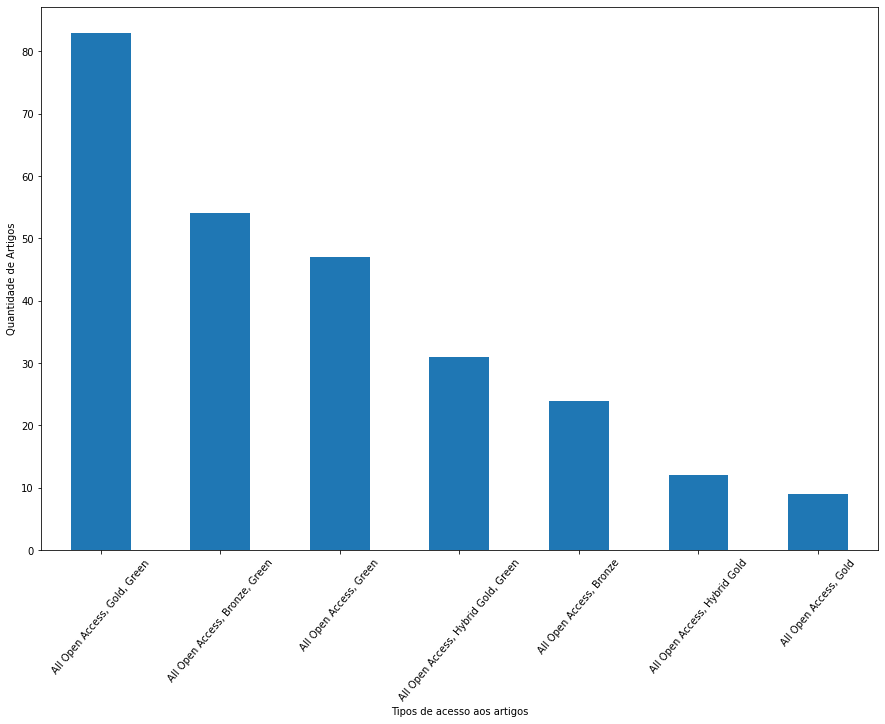

In [44]:
# pegar as 10 +
plt.figure(figsize=(15,10))
acesso_livre.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Tipos de acesso aos artigos")
plt.ylabel("Quantidade de Artigos")
plt.show()

In [45]:
# Analisando tipos de documentos
# Groupby by
tipo_documento = df_scopus.groupby("tipo_documento")

# Summary statistic of all
tipo_documento.describe().head()

ano                                                 \
                   count         mean       std     min     25%     50%   
tipo_documento                                                            
Article            328.0  2016.189024  4.865871  1992.0  2014.0  2017.5   
Book                 1.0  2014.000000       NaN  2014.0  2014.0  2014.0   
Book Chapter         8.0  2017.500000  2.878492  2013.0  2015.5  2018.5   
Conference Paper   161.0  2015.813665  3.564065  2005.0  2013.0  2016.0   
Conference Review    3.0  2015.333333  5.686241  2009.0  2013.0  2017.0   

                                   quantidade_paginas         ... fim_pagina_  \
                       75%     max              count   mean  ...         75%   
tipo_documento                                                ...               
Article            2020.00  2022.0                0.0    NaN  ...      775.25   
Book               2014.00  2014.0                0.0    NaN  ...      264.00   
Book Chapter       2019.25  2021.0                0.0    NaN  ...      792.25   
Conference Paper   2019.00  2022.0                1.0   11.0  ...      571.00   
Conference Review  2018.50  2020.0                2.0  971.0  ...      132.00   

                           quantidade_paginas_                                 \
                       max               count        mean         std    min   
tipo_documento                                                                  
Article            10381.0               216.0   82.675926  779.929255    1.0   
Book                 264.0                 1.0  263.000000         NaN  263.0   
Book Chapter        1111.0                 8.0   11.625000    8.331309    1.0   
Conference Paper    6096.0               141.0    6.390071    3.438798    1.0   
Conference Review    132.0                 1.0  131.000000         NaN  131.0   

                                                  
                      25%    50%     75%     max  
tipo_documento                                    
Article              6.00    8.0   10.00  9349.0  
Book               263.00  263.0  263.00   263.0  
Book Chapter         6.25   10.0   16.25    24.0  
Conference Paper     4.00    5.0    9.00    26.0  
Conference Review  131.00  131.0  131.00   131.0  

[5 rows x 128 columns]

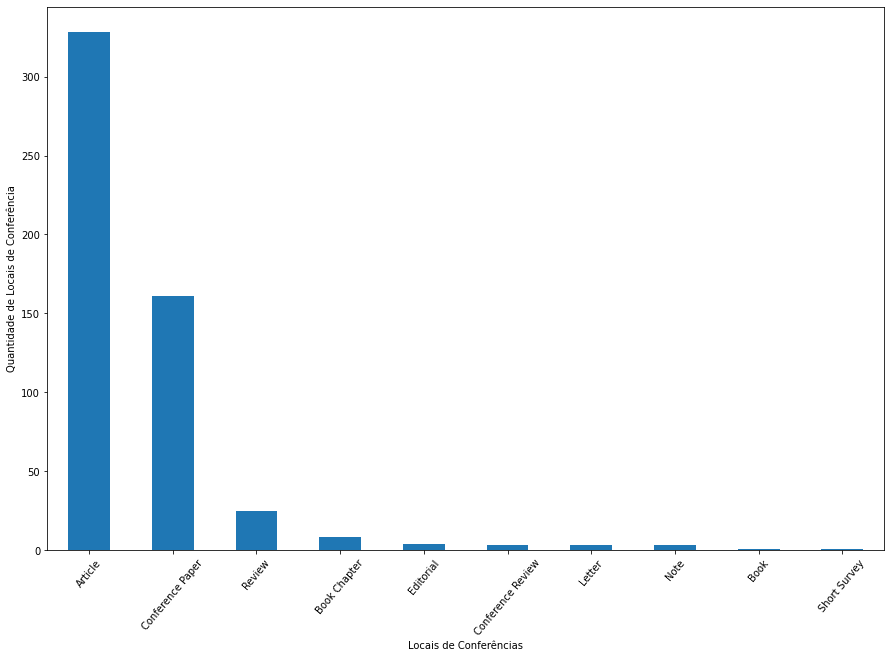

In [46]:
# pegar as 10 +
plt.figure(figsize=(15,10))
tipo_documento.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Locais de Conferências")
plt.ylabel("Quantidade de Locais de Conferência")
plt.show()

In [47]:
# Analisando Locais de Conferencia¶
# Groupby by
local_conferencia = df_scopus.groupby("local_conferencia")

# Summary statistic of all
local_conferencia.describe()

ano                                                       \
                  count    mean  std     min     25%     50%     75%     max   
local_conferencia                                                              
Amsterdam           1.0  2007.0  NaN  2007.0  2007.0  2007.0  2007.0  2007.0   
Arlington, VA       1.0  2010.0  NaN  2010.0  2010.0  2010.0  2010.0  2010.0   
Boston, MA          1.0  2012.0  NaN  2012.0  2012.0  2012.0  2012.0  2012.0   
Brisbane, QLD       1.0  2007.0  NaN  2007.0  2007.0  2007.0  2007.0  2007.0   
Copenhagen          4.0  2013.0  0.0  2013.0  2013.0  2013.0  2013.0  2013.0   
Daejeon             1.0  2008.0  NaN  2008.0  2008.0  2008.0  2008.0  2008.0   
Dallas, TX          1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Gaithersburg, MD    1.0  2011.0  NaN  2011.0  2011.0  2011.0  2011.0  2011.0   
Geneva              1.0  2005.0  NaN  2005.0  2005.0  2005.0  2005.0  2005.0   
Hangzhou            1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Huelva              1.0  2011.0  NaN  2011.0  2011.0  2011.0  2011.0  2011.0   
Jeju                1.0  2012.0  NaN  2012.0  2012.0  2012.0  2012.0  2012.0   
Maastricht          1.0  2006.0  NaN  2006.0  2006.0  2006.0  2006.0  2006.0   
Maui, HI            1.0  2012.0  NaN  2012.0  2012.0  2012.0  2012.0  2012.0   
Niagara Falls, NY   1.0  2010.0  NaN  2010.0  2010.0  2010.0  2010.0  2010.0   
Niagara Falls, ON   1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Oslo                1.0  2011.0  NaN  2011.0  2011.0  2011.0  2011.0  2011.0   
Perth               1.0  2010.0  NaN  2010.0  2010.0  2010.0  2010.0  2010.0   
Philadelphia, PA    1.0  2012.0  NaN  2012.0  2012.0  2012.0  2012.0  2012.0   
Pisa                2.0  2012.0  0.0  2012.0  2012.0  2012.0  2012.0  2012.0   
Saarbrucken         1.0  2009.0  NaN  2009.0  2009.0  2009.0  2009.0  2009.0   
San Francisco, CA   1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Singapore           1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Turin               1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Verona              2.0  2009.0  0.0  2009.0  2009.0  2009.0  2009.0  2009.0   
Wshington, DC       1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   

                  quantidade_paginas         ... fim_pagina_         \
                               count   mean  ...         75%    max   
local_conferencia                            ...                      
Amsterdam                        0.0    NaN  ...      246.00  246.0   
Arlington, VA                    0.0    NaN  ...      496.00  496.0   
Boston, MA                       0.0    NaN  ...       77.00   77.0   
Brisbane, QLD                    0.0    NaN  ...      549.00  549.0   
Copenhagen                       0.0    NaN  ...      628.50  686.0   
Daejeon                          0.0    NaN  ...      353.00  353.0   
Dallas, TX                       0.0    NaN  ...      280.00  280.0   
Gaithersburg, MD                 1.0   11.0  ...         NaN    NaN   
Geneva                           0.0    NaN  ...      828.00  828.0   
Hangzhou                         0.0    NaN  ...      443.00  443.0   
Huelva                           0.0    NaN  ...       74.00   74.0   
Jeju                             0.0    NaN  ...       29.00   29.0   
Maastricht                       0.0    NaN  ...      844.00  844.0   
Maui, HI                         0.0    NaN  ...       32.00   32.0   
Niagara Falls, NY                0.0    NaN  ...      329.00  329.0   
Niagara Falls, ON                0.0    NaN  ...      947.00  947.0   
Oslo                             0.0    NaN  ...      798.00  798.0   
Perth                            0.0    NaN  ...      461.00  461.0   
Philadelphia, PA                 0.0    NaN  ...      950.00  950.0   
Pisa                             0.0    NaN  ...      221.25  239.0   
Saarbrucken                      0.0    NaN  ...      102.00  102.

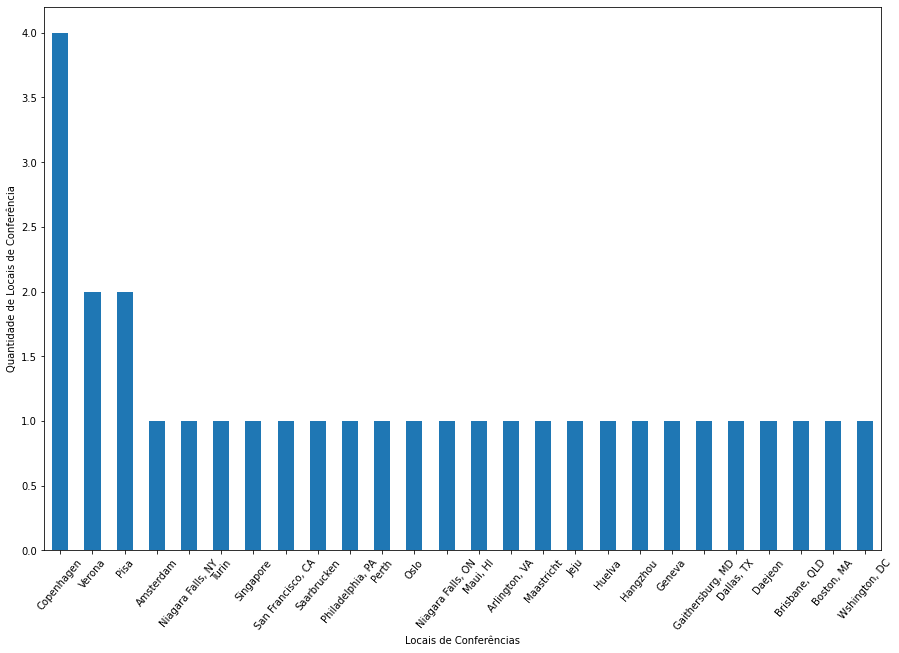

In [48]:
# pegar as 10 +
plt.figure(figsize=(15,10))
local_conferencia.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Locais de Conferências")
plt.ylabel("Quantidade de Locais de Conferência")
plt.show()

In [49]:
#Analisando Editores
# Groupby by
editor = df_scopus.groupby("editor")

# Summary statistic of all
editor.describe()

ano               \
                                                   count         mean   
editor                                                                  
Academic Press Inc.                                 42.0  2016.976190   
Adis                                                 5.0  2020.600000   
American Academy of Allergy, Asthma and Immunology   3.0  2019.333333   
American College of Physicians                       1.0  2017.000000   
American Society of Clinical Oncology                2.0  2020.000000   
...                                                  ...          ...   
Weston Medical Publishing                            1.0  2015.000000   
Wiley-Blackwell Publishing Ltd                       1.0  2018.000000   
World Scientific Publishing Co. Pte Ltd              3.0  2016.666667   
Wuhan University                                     1.0  2016.000000   
eLife Sciences Publications Ltd                      1.0  2017.000000   

                                                                              \
                                                         std     min     25%   
editor                                                                         
Academic Press Inc.                                 3.338527  2003.0  2015.0   
Adis                                                1.140175  2019.0  2020.0   
American Academy of Allergy, Asthma and Immunology  2.081666  2017.0  2018.5   
American College of Physicians                           NaN  2017.0  2017.0   
American Society of Clinical Oncology               0.000000  2020.0  2020.0   
...                                                      ...     ...     ...   
Weston Medical Publishing                                NaN  2015.0  2015.0   
Wiley-Blackwell Publishing Ltd                           NaN  2018.0  2018.0   
World Scientific Publishing Co. Pte Ltd             1.154701  2016.0  2016.0   
Wuhan University                                         NaN  2016.0  2016.0   
eLife Sciences Publications Ltd                          NaN  2017.0  2017.0   

                                                                            \
                                                       50%     75%     max   
editor                                                                       
Academic Press Inc.                                 2017.0  2019.0  2022.0   
Adis                                                2021.0  2021.0  2022.0   
American Academy of Allergy, Asthma and Immunology  2020.0  2020.5  2021.0   
American College of Physicians                      2017.0  2017.0  2017.0   
American Society of Clinical Oncology               2020.0  2020.0  2020.0   
...                                                    ...     ...     ...   
Weston Medical Publishing                           2015.0  2015.0  2015.0   
Wiley-Blackwell Publishing Ltd                      2018.0  2018.0  2018.0   
World Scientific Publishing Co. Pte Ltd             2016.0  2017.0  2018.0   
Wuhan University                                    2016.0  2016.0  2016.0   
eLife Sciences Publications Ltd                     2017.0  2017.0  2017.0   

                                                   quantidade_paginas       \
                                                                count mean   
editor                                                                       
Academic Press Inc.                                               0.0  NaN   
Adis                                                              0.0  NaN   
American Academy of Allergy, Asthma and Immunology                0.0  NaN   
American College of Physicians                                    0.0  NaN   
American Society of Clinical Oncology                             0.0  NaN   
...                                                               ...  ...   
Weston Medical Publishing                                         0.0  NaN   
Wiley-Blackwell Publishing Ltd      

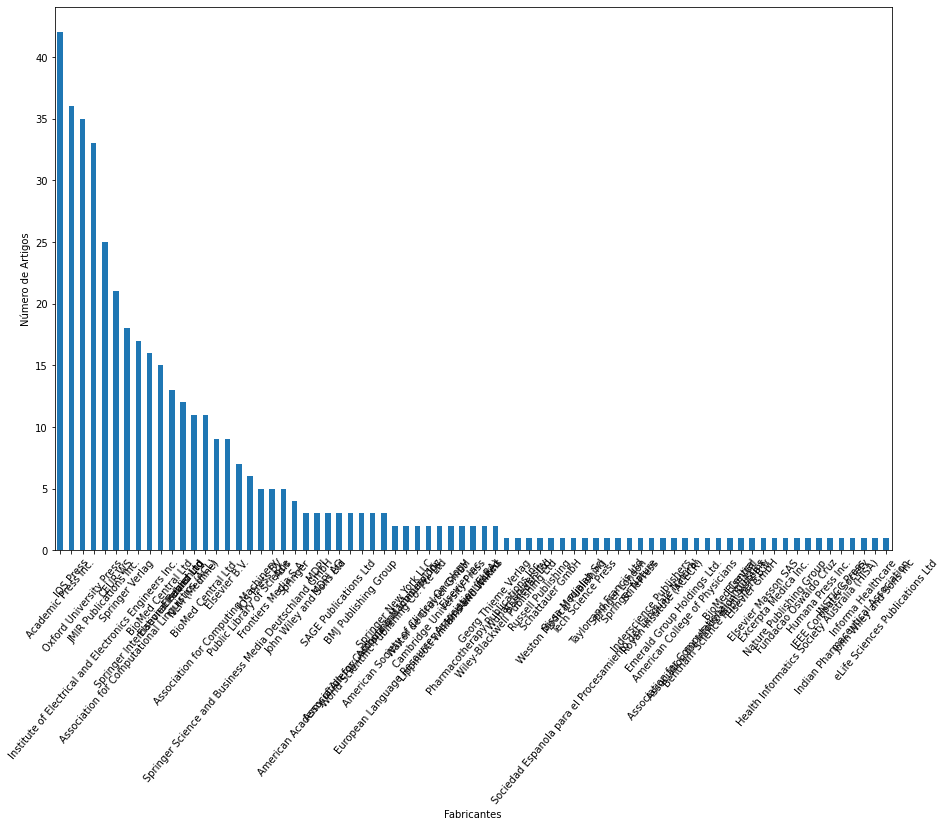

In [50]:
plt.figure(figsize=(15,10))
editor.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Fabricantes")
plt.ylabel("Número de Artigos")
plt.show()

In [51]:
# Analisando artigos por Ano
# Groupby by
ano = df_scopus.groupby("ano")

# Summary statistic of all
ano.describe()

quantidade_paginas                                                      \
                  count    mean std     min     25%     50%     75%     max   
ano                                                                           
1992                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2000                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2001                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2003                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2004                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2005                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2006                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2007                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2008                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2009                1.0   448.0 NaN   448.0   448.0   448.0   448.0   448.0   
2010                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2011                1.0    11.0 NaN    11.0    11.0    11.0    11.0    11.0   
2012                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2013                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2014                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2015                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2016                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2017                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2018                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2019                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2020                1.0  1494.0 NaN  1494.0  1494.0  1494.0  1494.0  1494.0   
2021                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2022                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   

     quantidade_citacoes               ... fim_pagina_           \
                   count         mean  ...         75%      max   
ano                                    ...                        
1992                 1.0    30.000000  ...      896.00    896.0   
2000                 1.0    22.000000  ...      153.00    153.0   
2001                 1.0  1339.000000  ...       21.00     21.0   
2003                 3.0   138.000000  ...      437.00    533.0   
2004                 4.0    13.500000  ...      578.00    767.0   
2005                 5.0    14.800000  ...     1137.50   2066.0   
2006                 6.0    38.666667  ...      678.00    844.0   
2007                 4.0     9.750000  ...      397.50    549.0   
2008                10.0    24.700000  ...      620.50    691.0   
2009                 7.0    47.428571  ...      379.75   2083.0   
2010                16.0    23.750000  ...      608.50    913.0   
2011                15.0    35.133333  ...      758.00   1279.0   
2012                17.0    31.117647  ...     1003.00   1582.0   
2013                25.0    23.200000  ...      728.50    961.0   
2014                32.0    29.906250  ...      657.75   1069.0   
2015                40.0    38.125000  ...      431.75   1788.0   
2016                28.0    38.107143  ...      534.50   2028.0   
2017                49.0    22.734694  ...      688.00   7433.0   
2018                50.0    15.320000  ...      733.50   4809.0   
2019                53.0    11.981132  ...      839.00   6096.0   
2020                48.0     8.104167  ...      697.25  10381.0   
2021                34.0     2.411765  ...      908.50   3020.0   
2022                 3.0     1.333333  ...     1170.00   2123.0   

     quantidade_paginas_                                                     \
                   count        mean          std   min    25%   50%    75%   
ano                                              

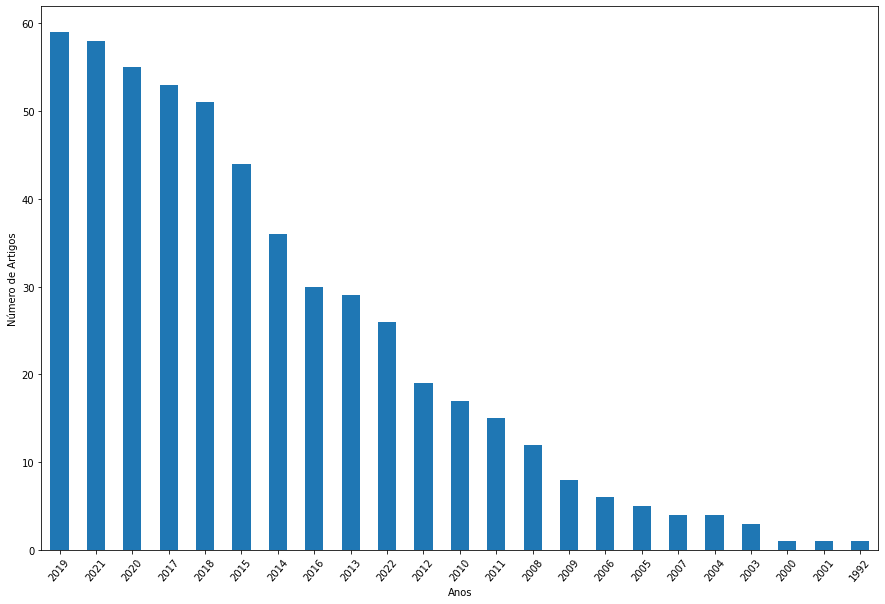

In [52]:
plt.figure(figsize=(15,10))
ano.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Anos")
plt.ylabel("Número de Artigos")
plt.show()

In [53]:
# Analisando os idiomas
# Groupby by
idioma = df_scopus.groupby("idioma_original")

# Summary statistic of all
idioma.describe().head()

ano                                                         \
                 count         mean       std     min     25%     50%     75%   
idioma_original                                                                 
English          535.0  2016.186916  4.450163  1992.0  2014.0  2017.0  2020.0   
French             1.0  2011.000000       NaN  2011.0  2011.0  2011.0  2011.0   
Spanish            1.0  2018.000000       NaN  2018.0  2018.0  2018.0  2018.0   

                        quantidade_paginas         ... fim_pagina_           \
                    max              count   mean  ...         75%      max   
idioma_original                                    ...                        
English          2022.0                3.0  651.0  ...      688.75  10381.0   
French           2011.0                0.0    NaN  ...      161.00    161.0   
Spanish          2018.0                0.0    NaN  ...       36.00     36.0   

                quantidade_paginas_                                        \
                              count       mean         std  min  25%  50%   
idioma_original                                                             
English                       392.0  49.596939  579.690874  1.0  4.0  7.0   
French                          1.0   3.000000         NaN  3.0  3.0  3.0   
Spanish                         1.0   5.000000         NaN  5.0  5.0  5.0   

                               
                  75%     max  
idioma_original                
English          9.25  9349.0  
French           3.00     3.0  
Spanish          5.00     5.0  

[3 rows x 128 columns]

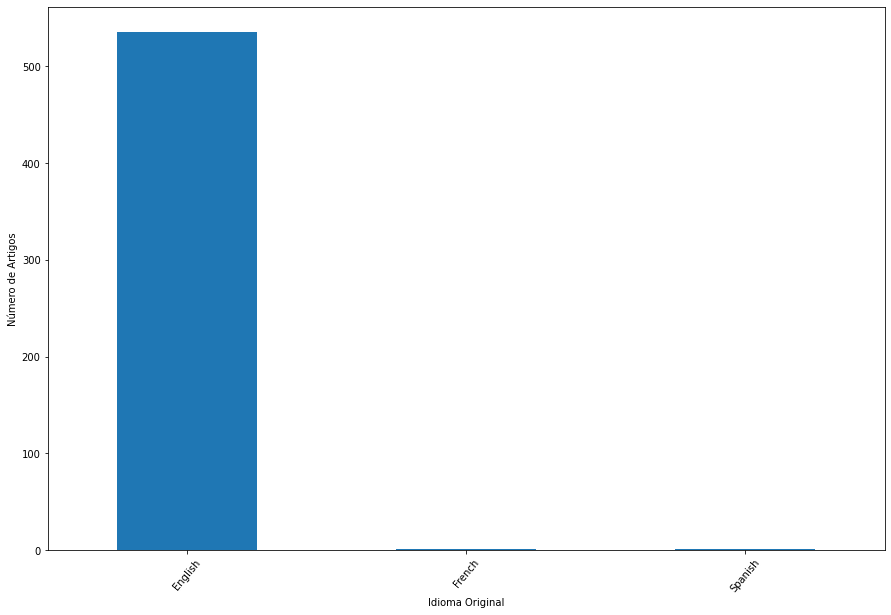

In [54]:
plt.figure(figsize=(15,10))
idioma.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Idioma Original")
plt.ylabel("Número de Artigos")
plt.show()

### Nuvem de Palavras dos Títulos

In [55]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [56]:
print('Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.')
#df_scopus['issn_scopus'] = df_scopus.issn_scopus.str.upper()
palavras_titulo = df_scopus['titulo_artigo'].str.lower()
palavras_titulo

Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.


95                                                                                  development of a questionnaire for detecting potential adverse drug reactions
129                              the use of a medical dictionary for regulatory activities terminology (meddra) in prescription event monitoring in japan (j pem)
0                                                                              effective mapping of biomedical text to the umls metathesaurus the metamap program
3                                                                                                           detecting adverse events using information technology
63                                                                            towards linking patients and clinical information detecting umls concepts in e mail
                                                                                  ...                                                                            
457    identification of han

In [57]:
print(f'Criando Nuvem de Palavras sem tratamento para ter ideia do corpus.')
# Variável recebe conteúdo do dataframe palavras concatenando cada conteúdo do texto separando por espaço
wordcloud_palavras_titulo = " ".join(s for s in palavras_titulo)
#wordcloud_palavras

Criando Nuvem de Palavras sem tratamento para ter ideia do corpus.


In [58]:
print(f'Quantidade de palavras no corpus: {len(wordcloud_palavras_titulo)} e seu tipo atual é{type(wordcloud_palavras_titulo)}')

Quantidade de palavras no corpus: 52002 e seu tipo atual é<class 'str'>


In [59]:
print(f'Criação da nuvem de palavras sem tratamento nos textos')
wordcloud_titulo = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,                            
                      height=800).generate(wordcloud_palavras_titulo)

Criação da nuvem de palavras sem tratamento nos textos


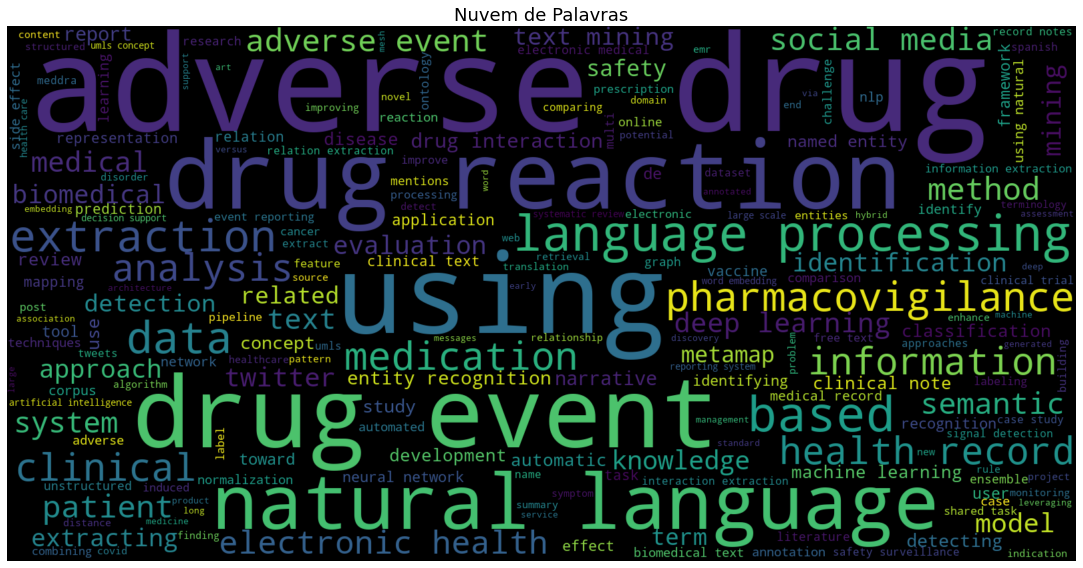

In [60]:
#Gráfico Nuvem de Palavras
# Gerando o grafico 
# Variáveis do gráfico 
path_image = '../image/'

titulo = 'Nuvem de Palavras'
#eixo_x = ''
#eixo_y = ''
image = path_image+'wordcloud_titulo'
extensao_arquivo = '.pdf'

#Gráfico
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud_titulo, interpolation='bilinear')
ax.set_axis_off()         

#legendas
#ax.legend(title='Legenda', loc=4, fontsize=9)
ax.set_title(titulo, fontsize=18)
#ax.set_xlabel(eixo_x, fontsize=9)
#ax.set_ylabel(eixo_y, fontsize=9)

#salvar imagens
plt.savefig(image+extensao_arquivo) #, format='pdf', dpi=300, transparent=True)
plt.tight_layout() 
plt.show()

### Nuvem de Palavras dos Resumos

In [61]:
print('Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.')
palavras_resumo = df_scopus['resumo'].str.lower()
palavras_resumo

Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.


95     objective: to develop a comprehensive list of symptoms categorized by body system as part of a questionnaire for detecting potential adverse drug reactions. data sources: a preliminary list of sym...
129    the medical dictionary for regulatory activities terminology (meddra) version 2.1 (v2.1) was released in march 1999 accompanied by the meddra/j v2.1j specifically for japanese users. in prescripti...
0      the umls metathesaurus, the largest thesaurus in the biomedical domain, provides a representation of biomedical knowledge consisting of concepts classified by semantic type and both hierarchical a...
3      context: although patient safety is a major problem, most health care organizations rely on spontaneous reporting, which detects only a small minority of adverse events. as a result, problems with...
63     the purpose of this project is to explore the feasibility of detecting terms within the electronic messages of patients that could be used to effectively search elec

In [62]:
print(f'Criando Nuvem de Palavras sem tratamento para ter ideia do corpus.')
# Variável recebe conteúdo do dataframe palavras concatenando cada conteúdo do texto separando por espaço
wordcloud_palavras_resumo = " ".join(s for s in palavras_resumo)
#wordcloud_palavras

Criando Nuvem de Palavras sem tratamento para ter ideia do corpus.


In [63]:
print(f'Quantidade de palavras no corpus: {len(wordcloud_palavras_resumo)} e seu tipo atual é{type(wordcloud_palavras_resumo)}')

Quantidade de palavras no corpus: 781594 e seu tipo atual é<class 'str'>


In [64]:
print(f'Criação da nuvem de palavras sem tratamento nos textos')
wordcloud_resumo = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,                            
                      height=800).generate(wordcloud_palavras_resumo)

Criação da nuvem de palavras sem tratamento nos textos


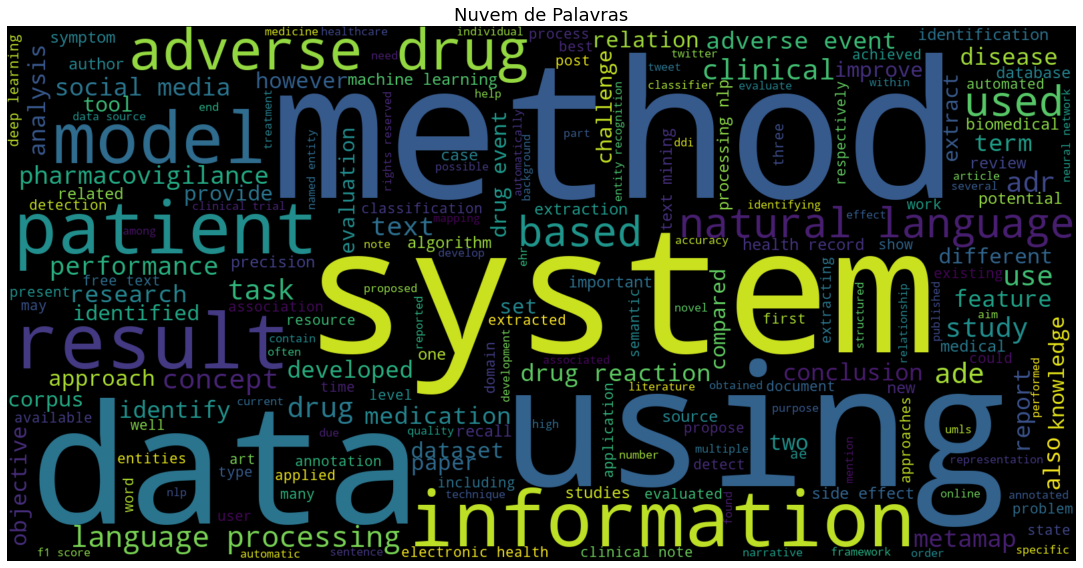

In [65]:
#Gráfico Nuvem de Palavras
path_image = '../image/'

titulo = 'Nuvem de Palavras'
#eixo_x = ''
#eixo_y = ''
image = path_image+'wordcloud_resumo'
extensao_arquivo = '.pdf'

#Gráfico
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud_resumo, interpolation='bilinear')
ax.set_axis_off()         

#legendas
#ax.legend(title='Legenda', loc=4, fontsize=9)
ax.set_title(titulo, fontsize=18)
#ax.set_xlabel(eixo_x, fontsize=9)
#ax.set_ylabel(eixo_y, fontsize=9)

#salvar imagens
plt.savefig(image+extensao_arquivo) #, format='pdf', dpi=300, transparent=True)
plt.tight_layout() 
plt.show()

## Exportação do resultado para Excel

In [117]:
df_scopus.columns

Index(['autores_scopus', 'id_autores', 'titulo_artigo', 'ano', 'titulo_fonte',
       'volume', 'publicado', 'numero_artigo', 'inicio_pagina', 'fim_pagina',
       'quantidade_paginas', 'quantidade_citacoes', 'doi_scopus',
       'link_scopus', 'afiliacoes', 'autores_com_filiacoes', 'resumo',
       'palavras_chaves_autor', 'palavras_chave_index',
       'numeros_sequencia_molecular', 'chemicals_cas', 'nomes_comerciais',
       'fabricantes', 'detalhes_financiamento', 'texto_financiamento_1',
       'texto_financiamento_2', 'texto_financiamento_3',
       'texto_financiamento_4', 'texto_financiamento_5',
       'texto_financiamento_6', 'texto_financiamento_7',
       'texto_financiamento_8', 'texto_financiamento_9',
       'texto_financiamento_10', 'referencias', 'endereco_correspondencia',
       'editores', 'patrocinadores', 'editor', 'nome_conferencia',
       'data_conferencia', 'local_conferencia', 'codigo_conferencia',
       'issn_scopus', 'isbn', 'coden', 'id_pubmed', 'idioma_o

In [121]:
## Gerar planilha com colunas especificas
#resultado_scopus = os.path.join('../data','scopus-08-06-2022.csv')
resultado_scopus = os.path.join('../data','resultado_scopus-08-06-2022.xlsx')
sheetname="base_scopus"

df_xlsx_scopus = pd.DataFrame(df_scopus, columns = [
       'issn_scopus','titulo_artigo', 'ano','quantidade_citacoes', 'tipo_documento', 'nome_conferencia',
       'editores', 'patrocinadores', 'editor',
       'autores', 'id_autores', 'titulo_fonte',
       'volume', 'publicado', 'numero_artigo',
       'inicio_pagina', 'fim_pagina','quantidade_paginas','inicio_pagina_','fim_pagina_','quantidade_paginas_',
       'doi', 'link_scopus',
       'afiliacoes', 'autores_com_filiacoes', 'resumo',
       'palavras_chaves_autor', 'palavras_chave_index',
       'numeros_sequencia_molecular', 'chemicals_cas', 'nomes_comerciais',
       'fabricantes',
       'detalhes_financiamento', 'texto_financiamento_1','texto_financiamento_2', 'texto_financiamento_3',
       'texto_financiamento_4','texto_financiamento_5', 'texto_financiamento_6', 'texto_financiamento_7',
       'texto_financiamento_8','texto_financiamento_9', 'texto_financiamento_10',
       'referencias', 'endereco_correspondencia', 
       'data_conferencia', 'local_conferencia',
       'codigo_conferencia', 'isbn', 'coden', 'id_pubmed',
       'idioma_original', 'titulo_abreviado_fonte', 
       'etapa_publicacao', 'acesso_livre', 'fonte', 'eid'
    ,])
df_xlsx_scopus = df_xlsx_scopus.to_excel(resultado_scopus, sheet_name=sheetname, index=False, encoding='utf-8', header=True)

# Carga - Base PubMed

In [67]:
print('Carga e Visualização do dataframe')
arquivo_base_pubmed = os.path.join('../data','pubmed-csv-naturallan-set-2022.csv')
raw_data_pubmed = pd.read_csv(arquivo_base_pubmed, sep=",", delimiter=None, encoding='utf-8')
raw_data_pubmed.head(3)

Carga e Visualização do dataframe


,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,PMCID,NIHMS ID,DOI
0,34653809,Automation of penicillin adverse drug reaction categorisation and risk stratification with machine learning natural language processing,"Inglis JM, Bacchi S, Troelnikov A, Smith W, Shakib S.",Int J Med Inform. 2021 Dec;156:104611. doi: 10.1016/j.ijmedinf.2021.104611. Epub 2021 Oct 5.,Inglis JM,Int J Med Inform,2021,2021/10/15,NaN,NaN,10.1016/j.ijmedinf.2021.104611
1,34406803,Customizable Natural Language Processing Biomarker Extraction Tool,"Holmes B, Chitale D, Loving J, Tran M, Subramanian V, Berry A, Rioth M, Warrier R, Brown T.",JCO Clin Cancer Inform. 2021 Aug;5:833-841. doi: 10.1200/CCI.21.00017.,Holmes B,JCO Clin Cancer Inform,2021,2021/08/18,NaN,NaN,10.1200/CCI.21.00017
2,28643174,Natural Language Processing for EHR-Based Pharmacovigilance: A Structured Review,"Luo Y, Thompson WK, Herr TM, Zeng Z, Berendsen MA, Jonnalagadda SR, Carson MB, Starren J.",Drug Saf. 2017 Nov;40(11):1075-1089. doi: 10.1007/s40264-017-0558-6.,Luo Y,Drug Saf,2017,2017/06/24,NaN,NaN,10.1007/s40264-017-0558-6


In [ ]:
print('Verificando tipos e se tem dados nulos')
## fazer as verificacoes e tals ----

In [68]:
## Verificar se os dataframes nao s"ao espelhos
#df_scopus = raw_data_scopus.copy()
#df_qualis = raw_data_qualis.copy()
df_pubmed = raw_data_pubmed.copy()

print(id(df_pubmed), id(raw_data_pubmed))

2557540313184 2557540312704


In [ ]:
print('Verificar colunas')
df_pubmed.columns

In [70]:
columns_pubmed = {
    'PMID':'id_pubmed',
    'Title':'titulo_artigo',
    'Authors':'autores_pubmed',
    'Citation':'citacao_pubmed',
    'First Author':'primeiro_autor_pubmed',
    'Journal/Book':'jornal_book_pubmed',
    'Publication Year':'ano_publicacao_pubmed',
    'Create Date':'data_criacao_pubmed', 
    'PMCID':'id_pmc_pubmed', 
    'NIHMS ID':'id_nihms_pubmed', 
    'DOI':'doi_pubmed',
}

In [71]:
df_pubmed = df_pubmed.rename(columns=columns_pubmed)
df_pubmed.head(2)

,id_pubmed,titulo_artigo,autores_pubmed,citacao_pubmed,primeiro_autor_pubmed,jornal_book_pubmed,ano_publicacao_pubmed,data_criacao_pubmed,id_pmc_pubmed,id_nihms_pubmed,doi_pubmed
0,34653809,Automation of penicillin adverse drug reaction categorisation and risk stratification with machine learning natural language processing,"Inglis JM, Bacchi S, Troelnikov A, Smith W, Shakib S.",Int J Med Inform. 2021 Dec;156:104611. doi: 10.1016/j.ijmedinf.2021.104611. Epub 2021 Oct 5.,Inglis JM,Int J Med Inform,2021,2021/10/15,NaN,NaN,10.1016/j.ijmedinf.2021.104611
1,34406803,Customizable Natural Language Processing Biomarker Extraction Tool,"Holmes B, Chitale D, Loving J, Tran M, Subramanian V, Berry A, Rioth M, Warrier R, Brown T.",JCO Clin Cancer Inform. 2021 Aug;5:833-841. doi: 10.1200/CCI.21.00017.,Holmes B,JCO Clin Cancer Inform,2021,2021/08/18,NaN,NaN,10.1200/CCI.21.00017


### Inclusão novas colunas

In [72]:
## criar uma coluna fonte com valor = pubmed
df_pubmed['fonte']='PubMed' # variavel para receber a base indexada do documento

In [73]:
# manter uma coluna padraa, a princiío estes  nao se repetem e podem ser critério de eliminacao de duplicata junto com título
df_pubmed["doi"] = df_pubmed["doi_pubmed"]

In [74]:
# manter uma coluna padraa, a princiío estes  nao se repetem e podem ser critério de eliminacao de duplicata 
df_pubmed["titulo_artigo_pubmed"] = df_pubmed["titulo_artigo"]

## Colunas para lower

In [75]:
df_pubmed["titulo_artigo"] = df_pubmed["titulo_artigo"].str.lower()
df_pubmed["doi"] = df_pubmed["doi"].str.lower()

In [76]:
df_pubmed["titulo_artigo"] = df_pubmed["titulo_artigo"].apply(lambda x: re.sub('\?|\*|;|,|\.|-|–|:|“|”|"|—|•', ' ', x))

In [77]:
df_pubmed.loc[:,'titulo_artigo'] = df_pubmed['titulo_artigo'].apply(limpar_campo)

In [78]:
df_pubmed['titulo_artigo'] = df_pubmed['titulo_artigo'].str.replace('  ', ' ')

In [79]:
df_pubmed["titulo_artigo"] = df_pubmed["titulo_artigo"].str.strip()

In [80]:
df_pubmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id_pubmed              188 non-null    int64 
 1   titulo_artigo          188 non-null    object
 2   autores_pubmed         188 non-null    object
 3   citacao_pubmed         188 non-null    object
 4   primeiro_autor_pubmed  188 non-null    object
 5   jornal_book_pubmed     188 non-null    object
 6   ano_publicacao_pubmed  188 non-null    int64 
 7   data_criacao_pubmed    188 non-null    object
 8   id_pmc_pubmed          134 non-null    object
 9   id_nihms_pubmed        20 non-null     object
 10  doi_pubmed             158 non-null    object
 11  fonte                  188 non-null    object
 12  doi                    158 non-null    object
 13  titulo_artigo_pubmed   188 non-null    object
dtypes: int64(2), object(12)
memory usage: 20.7+ KB


In [83]:
## nao funfou, verificar
df_pubmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id_pubmed              188 non-null    int64 
 1   titulo_artigo          188 non-null    object
 2   autores_pubmed         188 non-null    object
 3   citacao_pubmed         188 non-null    object
 4   primeiro_autor_pubmed  188 non-null    object
 5   jornal_book_pubmed     188 non-null    object
 6   ano_publicacao_pubmed  188 non-null    int64 
 7   data_criacao_pubmed    188 non-null    object
 8   id_pmc_pubmed          134 non-null    object
 9   id_nihms_pubmed        20 non-null     object
 10  doi_pubmed             158 non-null    object
 11  fonte                  188 non-null    object
 12  doi                    158 non-null    object
 13  titulo_artigo_pubmed   188 non-null    object
dtypes: int64(2), object(12)
memory usage: 20.7+ KB


In [84]:
print('Ajustar tipagem dos dados')
df_pubmed['jornal_book_pubmed'] = df_pubmed['jornal_book_pubmed'].astype('category')

Ajustar tipagem dos dados


In [85]:
## nao funfou, verificar
df_pubmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id_pubmed              188 non-null    int64   
 1   titulo_artigo          188 non-null    object  
 2   autores_pubmed         188 non-null    object  
 3   citacao_pubmed         188 non-null    object  
 4   primeiro_autor_pubmed  188 non-null    object  
 5   jornal_book_pubmed     188 non-null    category
 6   ano_publicacao_pubmed  188 non-null    int64   
 7   data_criacao_pubmed    188 non-null    object  
 8   id_pmc_pubmed          134 non-null    object  
 9   id_nihms_pubmed        20 non-null     object  
 10  doi_pubmed             158 non-null    object  
 11  fonte                  188 non-null    object  
 12  doi                    158 non-null    object  
 13  titulo_artigo_pubmed   188 non-null    object  
dtypes: category(1), int64(2), object(11)
memor

In [86]:
# Ordenando para excluir primeiro as duplicidades
df_pubmed = df_pubmed.sort_values(['doi_pubmed','titulo_artigo'])
df_pubmed[['doi_pubmed','titulo_artigo']]

,doi_pubmed,titulo_artigo
39,10.1002/pds.4857,comparison of text processing methods in social media based signal detection
21,10.1002/phar.2151,natural language processing and its implications for the future of medication safety a narrative review of recent advances and challenges
130,10.1002/prp2.421,screening of anticancer drugs to detect drug induced interstitial pneumonia using the accumulated data in the electronic medical record
76,10.1007/978-1-4939-0709-0_13,role of text mining in early identification of potential drug safety issues
100,10.1007/978-3-319-48472-3_43,an ontology enabled natural language processing pipeline for provenance metadata extraction from biomedical text (short paper)
...,...,...
35,NaN,social media mining shared task workshop
90,NaN,structured vs unstructured factors affecting adverse drug reaction documentation in an emr repository
85,NaN,structuring clinical decision support rules for drug safety using natural language processing
54,NaN,uarizona at the made1 0 nlp challenge


In [87]:
df_pubmed = df_pubmed.drop_duplicates(['titulo_artigo','doi_pubmed'], keep='last') ## de 188 para [187 rows x 14 columns]
print(df_pubmed)

     id_pubmed  \
39    31392844   
21    29884988   
130   30009034   
76    24788270   
100   28664200   
..         ...   
35    26776221   
90    22195188   
85    29968609   
54    30467557   
102   28269895   

                                                                                                                                 titulo_artigo  \
39                                                                comparison of text processing methods in social media based signal detection   
21   natural language processing and its implications for the future of medication safety a narrative review of recent advances and challenges   
130    screening of anticancer drugs to detect drug induced interstitial pneumonia using the accumulated data in the electronic medical record   
76                                                                 role of text mining in early identification of potential drug safety issues   
100             an ontology enabled natural language 

In [88]:
print('Verificando tipos e se tem dados nulos')
df_pubmed.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 39 to 102
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id_pubmed              187 non-null    int64   
 1   titulo_artigo          187 non-null    object  
 2   autores_pubmed         187 non-null    object  
 3   citacao_pubmed         187 non-null    object  
 4   primeiro_autor_pubmed  187 non-null    object  
 5   jornal_book_pubmed     187 non-null    category
 6   ano_publicacao_pubmed  187 non-null    int64   
 7   data_criacao_pubmed    187 non-null    object  
 8   id_pmc_pubmed          133 non-null    object  
 9   id_nihms_pubmed        20 non-null     object  
 10  doi_pubmed             158 non-null    object  
 11  fonte                  187 non-null    object  
 12  doi                    158 non-null    object  
 13  titulo_artigo_pubmed   187 non-null    object  
dtypes:

In [89]:
### analisar estes números máximos e mínimos ?????????
print('Resumo Estatístico de Campos Numéricos')
df_pubmed.describe()

Resumo Estatístico de Campos Numéricos


,id_pubmed,ano_publicacao_pubmed
count,1.870000e+02,187.000000
mean,2.927294e+07,2017.213904
std,4.830236e+06,4.126653
min,1.182515e+07,2001.000000
25%,2.655183e+07,2015.000000
50%,3.001090e+07,2018.000000
75%,3.294873e+07,2020.000000
max,3.561223e+07,2022.000000


## Planilha PubMed¶

In [122]:
df_pubmed.columns

Index(['id_pubmed', 'titulo_artigo', 'autores_pubmed', 'citacao_pubmed',
       'primeiro_autor_pubmed', 'jornal_book_pubmed', 'ano_publicacao_pubmed',
       'data_criacao_pubmed', 'id_pmc_pubmed', 'id_nihms_pubmed', 'doi_pubmed',
       'fonte', 'doi', 'titulo_artigo_pubmed'],
      dtype='object')

In [123]:
## Gerar planilha com colunas especificas
#resultado_geral = os.path.join('../data','scopus-31-05-2021.csv')
resultado_pubmed = os.path.join('../data','resultado_pubmed-08-06-22.xlsx')
sheetname="base_pubmed"

df_xlsx_pubmed = pd.DataFrame(df_pubmed, columns = [
    'id_pubmed', 'titulo_artigo','titulo_artigo_pubmed','ano_publicacao_pubmed','fonte','autores_pubmed', 'citacao_pubmed',
    'primeiro_autor_pubmed', 'jornal_book_pubmed','data_criacao_pubmed',
    'id_pmc_pubmed', 'id_nihms_pubmed', 'doi','doi_pubmed'
    ,])
df_xlsx_pubmed = df_xlsx_pubmed.to_excel(resultado_pubmed,sheet_name=sheetname,index=False, encoding='utf-8', header=True)

# Concatenar dataframes de bases indexadas

In [90]:
#https://www.acervolima.com.br/2020/08/concat-e-append-do-pandas-como-usar.html
qtde_scopus = df_scopus.titulo_artigo.count()
qtde_pubmed = df_pubmed.titulo_artigo.count()

# 3 colunas em comum: titulo_artigo, id_pubmed, fonte
shape_scopus = df_scopus.shape
shape_pubmed = df_pubmed.shape

print(f'A quantidade de artigos na base scopus é: {qtde_scopus} e a quantidade de colunas é {shape_scopus}')
print(f'A quantidade de artigos na base pubmed é: {qtde_pubmed} e a quantidade de colunas é {shape_pubmed}')
print(f'O total de artigos concatedos tem que ser {qtde_pubmed+qtde_scopus}')

A quantidade de artigos na base scopus é: 537 e a quantidade de colunas é (537, 59)
A quantidade de artigos na base pubmed é: 187 e a quantidade de colunas é (187, 14)
O total de artigos concatedos tem que ser 724


In [91]:
frames = [df_scopus, df_pubmed]

In [92]:
df_bases = pd.concat(frames)

In [93]:
df_bases

,autores_scopus,id_autores,titulo_artigo,ano,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,autores_pubmed,citacao_pubmed,primeiro_autor_pubmed,jornal_book_pubmed,ano_publicacao_pubmed,data_criacao_pubmed,id_pmc_pubmed,id_nihms_pubmed,doi_pubmed,titulo_artigo_pubmed
95,"Corso D.M., Pucino F., DeLeo J.M., Calis K.A., Gallelli J.F.",6602576929;6701705695;35579441300;57221571096;7003762821;,development of a questionnaire for detecting potential adverse drug reactions,1992.0,Annals of Pharmacotherapy,26,7-8,NaN,890,896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,"Yokotsuka M., Aoyama M., Kubota K.",6505861090;7202591218;24356074400;,the use of a medical dictionary for regulatory activities terminology (meddra) in prescription event monitoring in japan (j pem),2000.0,International Journal of Medical Informatics,57,2-3,NaN,139,153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Aronson A.R.,17933416200;,effective mapping of biomedical text to the umls metathesaurus the metamap program,2001.0,Proceedings / AMIA ... Annual Symposium. AMIA Symposium,NaN,NaN,NaN,17,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Bates D.W., Evans R.S., Murff H., Stetson P.D., Pizzifferri L., Hripcsak G.",57113031900;7405652324;6701719661;7005833624;6508207735;7004471151;,detecting adverse events using information technology,2003.0,Journal of the American Medical Informatics Association,10,2,NaN,115,128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,"Brennan P.F., Aronson A.R.",35473309900;17933416200;,towards linking patients and clinical information detecting umls concepts in e mail,2003.0,Journal of Biomedical Informatics,36,4-5,NaN,334,341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,NaN,NaN,social media mining shared task workshop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Sarker A, Nikfarjam A, Gonzalez G.",Pac Symp Biocomput. 2016;21:581-92.,Sarker A,Pac Symp Biocomput,2016.0,2016/01/19,NaN,NaN,NaN,SOCIAL MEDIA MINING SHARED TASK WORKSHOP
90,NaN,NaN,structured vs unstructured factors affecting adverse drug reaction documentation in an emr repository,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Skentzos S, Shubina M, Plutzky J, Turchin A.",AMIA Annu Symp Proc. 2011;2011:1270-9. Epub 2011 Oct 22.,Skentzos S,AMIA Annu Symp Proc,2011.0,2011/12/24,PMC3243255,NaN,NaN,Structured vs. unstructured: factors affecting adverse drug reaction documentation in an EMR repository
85,NaN,NaN,structuring clinical decision support rules for drug safety using natural language processing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Despotou G, Korkontzelos I, Matragkas N, Bilici E, Arvanitis TN.",Stud Health Technol Inform. 2018;251:89-92.,Despotou G,Stud Health Technol Inform,2018.0,2018/07/04,NaN,NaN,NaN,Structuring Clinical Decision Support Rules for Drug Safety Using Natural Language Processing
54,NaN,NaN,uarizona at the made1 0 nlp challenge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Xu D, Yadav V, Bethard S.",Proc Mach Learn Res. 2018 May;90:57-65.,Xu D,Proc Mach Learn Res,2018.0,2018/11/24,PMC6245580,NIHMS995640,NaN,UArizona at the MADE1.0 NLP Challenge


In [94]:
# Ordenando para excluir primeiro as duplicidades pubmed
df_bases = df_bases.sort_values(['fonte','autores_pubmed'])
df_bases

,autores_scopus,id_autores,titulo_artigo,ano,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,autores_pubmed,citacao_pubmed,primeiro_autor_pubmed,jornal_book_pubmed,ano_publicacao_pubmed,data_criacao_pubmed,id_pmc_pubmed,id_nihms_pubmed,doi_pubmed,titulo_artigo_pubmed
152,NaN,NaN,training augmented intelligent capabilities for pharmacovigilance applying deep learning approaches to individual case safety report processing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Abatemarco D, Perera S, Bao SH, Desai S, Assuncao B, Tetarenko N, Danysz K, Mockute R, Widdowson M, Fornarotto N, Beauchamp S, Cicirello S, Mingle E.",Pharmaceut Med. 2018;32(6):391-401. doi: 10.1007/s40290-018-0251-9. Epub 2018 Oct 13.,Abatemarco D,Pharmaceut Med,2018.0,2018/12/15,PMC6267537,NaN,10.1007/s40290-018-0251-9,Training Augmented Intelligent Capabilities for Pharmacovigilance: Applying Deep-learning Approaches to Individual Case Safety Report Processing
42,NaN,NaN,visualising patterns associated with adverse drug reactions in french forums,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Allam N, Audeh B, Jaulent MC, Bousquet C.",Stud Health Technol Inform. 2021 May 27;281:1110-1111. doi: 10.3233/SHTI210368.,Allam N,Stud Health Technol Inform,2021.0,2021/05/27,NaN,NaN,10.3233/SHTI210368,Visualising Patterns Associated with Adverse Drug Reactions in French Forums
182,NaN,NaN,crowdsourcing twitter annotations to identify first hand experiences of prescription drug use,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Alvaro N, Conway M, Doan S, Lofi C, Overington J, Collier N.",J Biomed Inform. 2015 Dec;58:280-287. doi: 10.1016/j.jbi.2015.11.004. Epub 2015 Nov 7.,Alvaro N,J Biomed Inform,2015.0,2015/11/12,NaN,NaN,10.1016/j.jbi.2015.11.004,Crowdsourcing Twitter annotations to identify first-hand experiences of prescription drug use
119,NaN,NaN,twimed twitter and pubmed comparable corpus of drugs diseases symptoms and their relations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Alvaro N, Miyao Y, Collier N.",JMIR Public Health Surveill. 2017 May 3;3(2):e24. doi: 10.2196/publichealth.6396.,Alvaro N,JMIR Public Health Surveill,2017.0,2017/05/05,PMC5438461,NaN,10.2196/publichealth.6396,"TwiMed: Twitter and PubMed Comparable Corpus of Drugs, Diseases, Symptoms, and Their Relations"
151,NaN,NaN,using social listening data to monitor misuse and nonmedical use of bupropion a content analysis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Anderson LS, Bell HG, Gilbert M, Davidson JE, Winter C, Barratt MJ, Win B, Painter JL, Menone C, Sayegh J, Dasgupta N.",JMIR Public Health Surveill. 2017 Feb 1;3(1):e6. doi: 10.2196/publichealth.6174.,Anderson LS,JMIR Public Health Surveill,2017.0,2017/02/03,PMC5311422,NaN,10.2196/publichealth.6174,Using Social Listening Data to Monitor Misuse and Nonmedical Use of Bupropion: A Content Analysis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,"Nishioka S., Watanabe T., Asano M., Yamamoto T., Kawakami K., Yada S., Aramaki E., Yajima H., Kizaki H., Hori S.",57665231500;57665866200;57666183300;57666504400;36484772100;57219665421;57203225161;57665866300;57607977600;8058209600;,identification of hand foot syndrome from cancer patients’ blog posts bert based deep learning approach to detect potential adverse drug reaction symptoms,2022.0,PLoS ONE,17,5 May,e0267901,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,"Yang J.C., Thygesen J.H., Werbeloff N., Hayes J.F., Osborn D.P.J.",57202692614;42162169300;25522505100;36518630100;7101639320;,antipsychotic polypharmacy and adverse drug reactions among adults in a london mental health service 2008 2018,2022.0,Psychological Medicine,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467,"Vo T.H., Nguyen N.T.K., Kha Q.H., Le N.Q.K.",57671574900;57211071169;57224131231;57208281644;,on the road to explainable ai in drug drug interactions prediction a systematic review,2022.0,Computational and Structural Biotechnology Journal,20,NaN,NaN,2112,2123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [95]:
df_bases.columns

Index(['autores_scopus', 'id_autores', 'titulo_artigo', 'ano', 'titulo_fonte',
       'volume', 'publicado', 'numero_artigo', 'inicio_pagina', 'fim_pagina',
       'quantidade_paginas', 'quantidade_citacoes', 'doi_scopus',
       'link_scopus', 'afiliacoes', 'autores_com_filiacoes', 'resumo',
       'palavras_chaves_autor', 'palavras_chave_index',
       'numeros_sequencia_molecular', 'chemicals_cas', 'nomes_comerciais',
       'fabricantes', 'detalhes_financiamento', 'texto_financiamento_1',
       'texto_financiamento_2', 'texto_financiamento_3',
       'texto_financiamento_4', 'texto_financiamento_5',
       'texto_financiamento_6', 'texto_financiamento_7',
       'texto_financiamento_8', 'texto_financiamento_9',
       'texto_financiamento_10', 'referencias', 'endereco_correspondencia',
       'editores', 'patrocinadores', 'editor', 'nome_conferencia',
       'data_conferencia', 'local_conferencia', 'codigo_conferencia',
       'issn_scopus', 'isbn', 'coden', 'id_pubmed', 'idioma_o

In [96]:
df_bases.query('doi_pubmed == "10.1007/978-3-319-48472-3_43" ')[['titulo_artigo','id_pubmed','issn_scopus','doi_scopus','doi_pubmed']]

,titulo_artigo,id_pubmed,issn_scopus,doi_scopus,doi_pubmed
100,an ontology enabled natural language processing pipeline for provenance metadata extraction from biomedical text (short paper),28664200.0,NaN,NaN,10.1007/978-3-319-48472-3_43


In [97]:
df_bases.query('doi_scopus == "10.1007/978-3-319-48472-3_43" ')[['titulo_artigo','id_pubmed','issn_scopus','doi_scopus','doi_pubmed']]

,titulo_artigo,id_pubmed,issn_scopus,doi_scopus,doi_pubmed
289,an ontology enabled natural language processing pipeline for provenance metadata extraction from biomedical text,NaN,03029743,10.1007/978-3-319-48472-3_43,NaN


### Aplicando caracteres especiais

In [98]:
#remove números e caracteres especiais
#df_bases["titulo_artigo"] = df_bases["titulo_artigo"].apply(lambda x: re.sub('\?|\*|;|,|\.|-|–|:|“|”|"|—|•', ' ', x))

df_bases["titulo_artigo"] = df_bases["titulo_artigo"].apply(lambda x: re.sub('\?|\*|;|,|\.|-|–|:|"|•', ' ', x))

In [99]:
df_bases.loc[:,'titulo_artigo'] = df_bases['titulo_artigo'].apply(limpar_campo)

In [100]:
df_bases['titulo_artigo'] = df_bases['titulo_artigo'].str.replace('  ', ' ')

In [101]:
df_bases["titulo_artigo"] = df_bases["titulo_artigo"].str.strip()

In [102]:
df_bases.query('doi_pubmed == "10.1007/978-3-319-48472-3_43" ')[['titulo_artigo','id_pubmed','issn_scopus','doi_scopus','doi_pubmed']]

,titulo_artigo,id_pubmed,issn_scopus,doi_scopus,doi_pubmed
100,an ontology enabled natural language processing pipeline for provenance metadata extraction from biomedical text (short paper),28664200.0,NaN,NaN,10.1007/978-3-319-48472-3_43


## Excluir duplicatas

In [103]:
df_bases = df_bases.drop_duplicates(['titulo_artigo', 'doi'], keep='last') ## de 724 para [561 rows x 69 columns]
print(df_bases)

                                                                                                       autores_scopus  \
164                                                                                                               NaN   
85                                                                                                                NaN   
122                                                                                                               NaN   
99                                                                                                                NaN   
183                                                                                                               NaN   
..                                                                                                                ...   
457  Nishioka S., Watanabe T., Asano M., Yamamoto T., Kawakami K., Yada S., Aramaki E., Yajima H., Kizaki H., Hori S.   
468                             

In [104]:
df_bases = df_bases.drop_duplicates(['titulo_artigo', 'id_pubmed'], keep='last') #### de 561 para [554 rows x 554 columns]
print(df_bases)

                                                                                                       autores_scopus  \
122                                                                                                               NaN   
99                                                                                                                NaN   
174                                                                                                               NaN   
181                                                                                                               NaN   
30                                                                                                                NaN   
..                                                                                                                ...   
457  Nishioka S., Watanabe T., Asano M., Yamamoto T., Kawakami K., Yada S., Aramaki E., Yajima H., Kizaki H., Hori S.   
468                             

## Filtrar base indexada final¶

In [105]:
# ver os tipos de documentos
df_bases.groupby(by=["tipo_documento"]).sum()

,ano,quantidade_paginas,quantidade_citacoes,numeros_sequencia_molecular,texto_financiamento_4,texto_financiamento_5,texto_financiamento_6,texto_financiamento_7,texto_financiamento_8,texto_financiamento_9,texto_financiamento_10,codigo_conferencia,id_pubmed,inicio_pagina_,fim_pagina_,quantidade_paginas_,ano_publicacao_pubmed
tipo_documento,,,,,,,,,,,,,,,,,
Article,661310.0,0.0,9267.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.150187e+09,126963.0,138683.0,17858.0,0.0
Book,2014.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.0,264.0,263.0,0.0
Book Chapter,16140.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.404286e+07,3756.0,3849.0,93.0,0.0
Conference Paper,324546.0,11.0,1217.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20984161.0,9.948066e+08,66111.0,63583.0,901.0,0.0
Conference Review,6046.0,1942.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,428626.0,0.000000e+00,1.0,132.0,131.0,0.0
Editorial,8072.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.190715e+08,1166.0,1174.0,8.0,0.0
Letter,6049.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.394043e+07,3528.0,3534.0,6.0,0.0
Note,6056.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.864613e+07,1120.0,1134.0,14.0,0.0
Review,50437.0,0.0,707.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.143306e+08,9792.0,9967.0,175.0,0.0


In [106]:
# retirar documentos: Conference Review, Editorial, letter e Note
# gerar plan geral e testar se os filtros funcionam só no scopus para maior assertividade

lista_tipo_doc = ["Conference Review","Editorial","Letter","Note"]

df_bases_filtrado = df_bases.query('tipo_documento != @lista_tipo_doc ') ## de 531 para = 519 rows × 62 columns
df_bases_filtrado

,autores_scopus,id_autores,titulo_artigo,ano,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,autores_pubmed,citacao_pubmed,primeiro_autor_pubmed,jornal_book_pubmed,ano_publicacao_pubmed,data_criacao_pubmed,id_pmc_pubmed,id_nihms_pubmed,doi_pubmed,titulo_artigo_pubmed
122,NaN,NaN,v3nlp framework tools to build applications for extracting concepts from clinical text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Divita G, Carter ME, Tran LT, Redd D, Zeng QT, Duvall S, Samore MH, Gundlapalli AV.",EGEMS (Wash DC). 2016 Aug 11;4(3):1228. doi: 10.13063/2327-9214.1228. eCollection 2016.,Divita G,EGEMS (Wash DC),2016.0,2016/09/30,PMC5019303,NaN,10.13063/2327-9214.1228,v3NLP Framework: Tools to Build Applications for Extracting Concepts from Clinical Text
99,NaN,NaN,intelligent telehealth in pharmacovigilance a future perspective,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Edrees H, Song W, Syrowatka A, Simona A, Amato MG, Bates DW.",Drug Saf. 2022 May;45(5):449-458. doi: 10.1007/s40264-022-01172-5. Epub 2022 May 17.,Edrees H,Drug Saf,2022.0,2022/05/17,PMC9112241,NaN,10.1007/s40264-022-01172-5,Intelligent Telehealth in Pharmacovigilance: A Future Perspective
174,NaN,NaN,artificial intelligence enabled social media analysis for pharmacovigilance of covid 19 vaccinations in the united kingdom observational study,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Hussain Z, Sheikh Z, Tahir A, Dashtipour K, Gogate M, Sheikh A, Hussain A.",JMIR Public Health Surveill. 2022 May 27;8(5):e32543. doi: 10.2196/32543.,Hussain Z,JMIR Public Health Surveill,2022.0,2022/02/10,PMC9150729,NaN,10.2196/32543,Artificial Intelligence-Enabled Social Media Analysis for Pharmacovigilance of COVID-19 Vaccinations in the United Kingdom: Observational Study
181,NaN,NaN,prediction of personal experience tweets of medication use via contextual word representations(),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Jiang K, Chen T, Calix RA, Bernard GR.",Annu Int Conf IEEE Eng Med Biol Soc. 2019 Jul;2019:6093-6096. doi: 10.1109/EMBC.2019.8856753.,Jiang K,Annu Int Conf IEEE Eng Med Biol Soc,2019.0,2020/01/18,NaN,NaN,10.1109/EMBC.2019.8856753,Prediction of Personal Experience Tweets of Medication Use via Contextual Word Representations()
30,NaN,NaN,normalizing adverse events using recurrent neural networks with attention,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Lee K, Uzuner Ö.",AMIA Jt Summits Transl Sci Proc. 2020 May 30;2020:345-354. eCollection 2020.,Lee K,AMIA Jt Summits Transl Sci Proc,2020.0,2020/06/02,PMC7233057,NaN,NaN,Normalizing Adverse Events using Recurrent Neural Networks with Attention
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,"Nishioka S., Watanabe T., Asano M., Yamamoto T., Kawakami K., Yada S., Aramaki E., Yajima H., Kizaki H., Hori S.",57665231500;57665866200;57666183300;57666504400;36484772100;57219665421;57203225161;57665866300;57607977600;8058209600;,identification of hand foot syndrome from cancer patients’ blog posts bert based deep learning approach to detect potential adverse drug reaction symptoms,2022.0,PLoS ONE,17,5 May,e0267901,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,"Yang J.C., Thygesen J.H., Werbeloff N., Hayes J.F., Osborn D.P.J.",57202692614;42162169300;25522505100;36518630100;7101639320;,antipsychotic polypharmacy and adverse drug reactions among adults in a london mental health service 2008 2018,2022.0,Psychological Medicine,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467,"Vo T.H., Nguyen N.T.K., Kha Q.H., Le N.Q.K.",57671574900;57211071169;57224131231;57208281644;,on the road to explainable ai in drug drug interactions prediction a systematic review,2022.0,Computational and Structural Biotechnology Journal,20,NaN,NaN,2112,2123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456,Aronson J.K.,55683060600;,artificial intelligence in pharmacovigilance an introduction to terms concepts applications and limitations,2022.0,Drug Safety,45,5,NaN,407,418,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# retirar documentos com menos de 3 páginas e deixar os campos vazios tbm

#numumero_paginas = 3

#df.query('year > 2012 | name == "Frank"')
#df_bases_filtrado = df_bases.query('quantidade_paginas_ > @numumero_paginas ')
#df_bases_filtrado = df_bases.query('quantidade_paginas_ == None ')


df_bases_filtrado = df_bases_filtrado[df_bases_filtrado['quantidade_paginas_'].isnull() | (df_bases_filtrado['quantidade_paginas_'] > 3) ]
df_bases_filtrado 

,autores_scopus,id_autores,titulo_artigo,ano,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,autores_pubmed,citacao_pubmed,primeiro_autor_pubmed,jornal_book_pubmed,ano_publicacao_pubmed,data_criacao_pubmed,id_pmc_pubmed,id_nihms_pubmed,doi_pubmed,titulo_artigo_pubmed
122,NaN,NaN,v3nlp framework tools to build applications for extracting concepts from clinical text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Divita G, Carter ME, Tran LT, Redd D, Zeng QT, Duvall S, Samore MH, Gundlapalli AV.",EGEMS (Wash DC). 2016 Aug 11;4(3):1228. doi: 10.13063/2327-9214.1228. eCollection 2016.,Divita G,EGEMS (Wash DC),2016.0,2016/09/30,PMC5019303,NaN,10.13063/2327-9214.1228,v3NLP Framework: Tools to Build Applications for Extracting Concepts from Clinical Text
99,NaN,NaN,intelligent telehealth in pharmacovigilance a future perspective,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Edrees H, Song W, Syrowatka A, Simona A, Amato MG, Bates DW.",Drug Saf. 2022 May;45(5):449-458. doi: 10.1007/s40264-022-01172-5. Epub 2022 May 17.,Edrees H,Drug Saf,2022.0,2022/05/17,PMC9112241,NaN,10.1007/s40264-022-01172-5,Intelligent Telehealth in Pharmacovigilance: A Future Perspective
174,NaN,NaN,artificial intelligence enabled social media analysis for pharmacovigilance of covid 19 vaccinations in the united kingdom observational study,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Hussain Z, Sheikh Z, Tahir A, Dashtipour K, Gogate M, Sheikh A, Hussain A.",JMIR Public Health Surveill. 2022 May 27;8(5):e32543. doi: 10.2196/32543.,Hussain Z,JMIR Public Health Surveill,2022.0,2022/02/10,PMC9150729,NaN,10.2196/32543,Artificial Intelligence-Enabled Social Media Analysis for Pharmacovigilance of COVID-19 Vaccinations in the United Kingdom: Observational Study
181,NaN,NaN,prediction of personal experience tweets of medication use via contextual word representations(),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Jiang K, Chen T, Calix RA, Bernard GR.",Annu Int Conf IEEE Eng Med Biol Soc. 2019 Jul;2019:6093-6096. doi: 10.1109/EMBC.2019.8856753.,Jiang K,Annu Int Conf IEEE Eng Med Biol Soc,2019.0,2020/01/18,NaN,NaN,10.1109/EMBC.2019.8856753,Prediction of Personal Experience Tweets of Medication Use via Contextual Word Representations()
30,NaN,NaN,normalizing adverse events using recurrent neural networks with attention,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Lee K, Uzuner Ö.",AMIA Jt Summits Transl Sci Proc. 2020 May 30;2020:345-354. eCollection 2020.,Lee K,AMIA Jt Summits Transl Sci Proc,2020.0,2020/06/02,PMC7233057,NaN,NaN,Normalizing Adverse Events using Recurrent Neural Networks with Attention
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,"Nishioka S., Watanabe T., Asano M., Yamamoto T., Kawakami K., Yada S., Aramaki E., Yajima H., Kizaki H., Hori S.",57665231500;57665866200;57666183300;57666504400;36484772100;57219665421;57203225161;57665866300;57607977600;8058209600;,identification of hand foot syndrome from cancer patients’ blog posts bert based deep learning approach to detect potential adverse drug reaction symptoms,2022.0,PLoS ONE,17,5 May,e0267901,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,"Yang J.C., Thygesen J.H., Werbeloff N., Hayes J.F., Osborn D.P.J.",57202692614;42162169300;25522505100;36518630100;7101639320;,antipsychotic polypharmacy and adverse drug reactions among adults in a london mental health service 2008 2018,2022.0,Psychological Medicine,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467,"Vo T.H., Nguyen N.T.K., Kha Q.H., Le N.Q.K.",57671574900;57211071169;57224131231;57208281644;,on the road to explainable ai in drug drug interactions prediction a systematic review,2022.0,Computational and Structural Biotechnology Journal,20,NaN,NaN,2112,2123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456,Aronson J.K.,55683060600;,artificial intelligence in pharmacovigilance an introduction to terms concepts applications and limitations,2022.0,Drug Safety,45,5,NaN,407,418,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
# Ordenando 
df_bases_filtrado = df_bases_filtrado.sort_values(['titulo_artigo','id_pubmed'])
df_bases_filtrado

,autores_scopus,id_autores,titulo_artigo,ano,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,autores_pubmed,citacao_pubmed,primeiro_autor_pubmed,jornal_book_pubmed,ano_publicacao_pubmed,data_criacao_pubmed,id_pmc_pubmed,id_nihms_pubmed,doi_pubmed,titulo_artigo_pubmed
66,"Henry S., Buchan K., Filannino M., Stubbs A., Uzuner O.",57195512541;57194652773;25633782800;56086371300;6507268190;,2018 n2c2 shared task on adverse drug events and medication extraction in electronic health records,2020.0,Journal of the American Medical Informatics Association,27,1,NaN,3,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,"Wu Y., Denny J.C., Rosenbloom S.T., Miller R.A., Giuse D.A., Xu H.",55645924700;7005252620;7003853908;8093690100;6701504476;55493876700;,a comparative study of current clinical natural language processing systems on handling abbreviations in discharge summaries,2012.0,AMIA ... Annual Symposium proceedings / AMIA Symposium. AMIA Symposium,2012,NaN,NaN,997,1003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418,"Sabra S., Sabeeh V.",57189298972;57202214511;,a comparative study of n gram and skip gram for clinical concepts extraction,2020.0,"Proceedings - 2020 International Conference on Computational Science and Computational Intelligence, CSCI 2020",NaN,NaN,9458183,807,812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,"Danger R., Segura-Bedmar I., Martínez P., Rosso P.",55920998300;35303400800;7202906176;8960238100;,a comparison of machine learning techniques for detection of drug target articles,2010.0,Journal of Biomedical Informatics,43,6,NaN,902,913,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,"Qiu Y., Zhang Y., Deng Y., Liu S., Zhang W.",57216565394;57218471527;57219231397;57210886728;57190273716;,a comprehensive review of computational methods for drug drug interaction detection,2021.0,IEEE/ACM Transactions on Computational Biology and Bioinformatics,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,"Kamath S., Grau B., Ma Y.",57211522546;6602537391;9040652900;,verification of the expected answer type for biomedical question answering,2018.0,"The Web Conference 2018 - Companion of the World Wide Web Conference, WWW 2018",NaN,NaN,NaN,1093,1097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,"Chase H.S., Kaufman D.R., Johnson S.B., Mendonca E.A.",7103097287;34770630900;7406330166;7004308859;,voice capture of medical residents' clinical information needs during an inpatient rotation,2009.0,Journal of the American Medical Informatics Association,16,3,NaN,387,394,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,"Priyadarshi A., Saha S.K.",57212489282;36937742800;,web information extraction for finding remedy based on a patient authored text a study on homeopathy,2020.0,Network Modeling Analysis in Health Informatics and Bioinformatics,9,1,9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,"Jiang J., Guan Y., Zhao C.",56376858400;7202924009;57189217850;,wi enre in clef ehealth evaluation lab 2015 clinical named entity recognition based on crf,2015.0,CEUR Workshop Proceedings,1391,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Ajustes de bases indexadas final

In [109]:
# Criar colunas
df_bases_filtrado['leitura_resumo']=0 # 0 nao foi lido e 1 foi lido 
df_bases_filtrado['leitura_conclusao']=0 # 0 nao foi lido e 1 foi lido
df_bases_filtrado['leitura_completa']=0 # 0 nao foi lido e 1 foi lido
df_bases_filtrado['resumo_traduzido']=None # 
df_bases_filtrado['documentos_6+']=0 # variavel que marca os artigos + tops para ler
df_bases_filtrado['documentos_94+']=0 # variavel que marca os artigos + tops para ler
df_bases_filtrado['pdf_baixado']=0 #

# colunas para marcar estudo posterior para conceitos
df_bases_filtrado['conceituar_metamap']=0 # variavel que marca artigo para rever conceito
df_bases_filtrado['conceituar_farmacovigilancia']=0 # variavel que marca artigo para rever conceito
df_bases_filtrado['conceituar_Reacao_adversa_medicamentos_RAM']=0 # variavel que marca artigo para rever conceito
df_bases_filtrado['conceituar_Reacao_adversa_medicamentos_RAM']=0 # variavel que marca artigo para rever conceito
df_bases_filtrado['conceituar_reconhecimento_entidades_nomeadas_REN']=0 # variavel que marca artigo para rever conceito
df_bases_filtrado['conceituar_UMLS']=0
df_bases_filtrado['conceituar_metamap_data_file_builder_DFB']=0
df_bases_filtrado['conceituar_ferramenta_lexicos_LVG']=0
df_bases_filtrado['conceituar_MetamorphoSys']=0
df_bases_filtrado['conceituar_NLP']=0
df_bases_filtrado['conceituar_outros']=None

In [110]:
# Colocar estes campos no dataframe final filtrado

df_bases_filtrado['palavras_chaves_titulo']=None # variavel para receber as palavras + importantes em um artigo
df_bases_filtrado['palavras_chaves_resumo']=None # variavel para receber as palavras + importantes em um artigo

In [111]:
# Colocar estes campos no dataframe final filtrado

df_bases_filtrado.loc[
    (df_bases_filtrado['titulo_artigo'].str.contains('twitter'))|
    (df_bases_filtrado['titulo_artigo'].str.contains('metamap'))|
    (df_bases_filtrado['titulo_artigo'].str.contains('NLP'))|
    (df_bases_filtrado['titulo_artigo'].str.contains('social media'))|
    (df_bases_filtrado['titulo_artigo'].str.contains('social network'))|
    (df_bases_filtrado['titulo_artigo'].str.contains('natural language processing')),'palavras_chaves_titulo'] = "twitter|metamap|nlp"

df_bases_filtrado.query('palavras_chaves_titulo=="twitter|metamap|nlp"')['titulo_artigo'].count()

126

In [112]:
df_bases_filtrado.loc[
    (df_bases_filtrado['resumo'].str.contains('twitter'))|
    (df_bases_filtrado['resumo'].str.contains('metamap'))|
    (df_bases_filtrado['resumo'].str.contains('NLP'))|
    (df_bases_filtrado['resumo'].str.contains('social media'))|
    (df_bases_filtrado['resumo'].str.contains('social network'))|
    (df_bases_filtrado['resumo'].str.contains('natural language processing')),'palavras_chaves_resumo'] = "twitter|metamap|nlp"


df_bases_filtrado.query('palavras_chaves_resumo=="twitter|metamap|nlp"')['resumo'].count()

377

In [113]:
df_bases_filtrado

,autores_scopus,id_autores,titulo_artigo,ano,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,conceituar_Reacao_adversa_medicamentos_RAM,conceituar_reconhecimento_entidades_nomeadas_REN,conceituar_UMLS,conceituar_metamap_data_file_builder_DFB,conceituar_ferramenta_lexicos_LVG,conceituar_MetamorphoSys,conceituar_NLP,conceituar_outros,palavras_chaves_titulo,palavras_chaves_resumo
66,"Henry S., Buchan K., Filannino M., Stubbs A., Uzuner O.",57195512541;57194652773;25633782800;56086371300;6507268190;,2018 n2c2 shared task on adverse drug events and medication extraction in electronic health records,2020.0,Journal of the American Medical Informatics Association,27,1,NaN,3,12,...,0,0,0,0,0,0,0,None,None,None
39,"Wu Y., Denny J.C., Rosenbloom S.T., Miller R.A., Giuse D.A., Xu H.",55645924700;7005252620;7003853908;8093690100;6701504476;55493876700;,a comparative study of current clinical natural language processing systems on handling abbreviations in discharge summaries,2012.0,AMIA ... Annual Symposium proceedings / AMIA Symposium. AMIA Symposium,2012,NaN,NaN,997,1003,...,0,0,0,0,0,0,0,None,twitter|metamap|nlp,twitter|metamap|nlp
418,"Sabra S., Sabeeh V.",57189298972;57202214511;,a comparative study of n gram and skip gram for clinical concepts extraction,2020.0,"Proceedings - 2020 International Conference on Computational Science and Computational Intelligence, CSCI 2020",NaN,NaN,9458183,807,812,...,0,0,0,0,0,0,0,None,None,twitter|metamap|nlp
214,"Danger R., Segura-Bedmar I., Martínez P., Rosso P.",55920998300;35303400800;7202906176;8960238100;,a comparison of machine learning techniques for detection of drug target articles,2010.0,Journal of Biomedical Informatics,43,6,NaN,902,913,...,0,0,0,0,0,0,0,None,None,None
368,"Qiu Y., Zhang Y., Deng Y., Liu S., Zhang W.",57216565394;57218471527;57219231397;57210886728;57190273716;,a comprehensive review of computational methods for drug drug interaction detection,2021.0,IEEE/ACM Transactions on Computational Biology and Bioinformatics,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,None,None,twitter|metamap|nlp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,"Kamath S., Grau B., Ma Y.",57211522546;6602537391;9040652900;,verification of the expected answer type for biomedical question answering,2018.0,"The Web Conference 2018 - Companion of the World Wide Web Conference, WWW 2018",NaN,NaN,NaN,1093,1097,...,0,0,0,0,0,0,0,None,None,twitter|metamap|nlp
156,"Chase H.S., Kaufman D.R., Johnson S.B., Mendonca E.A.",7103097287;34770630900;7406330166;7004308859;,voice capture of medical residents' clinical information needs during an inpatient rotation,2009.0,Journal of the American Medical Informatics Association,16,3,NaN,387,394,...,0,0,0,0,0,0,0,None,None,twitter|metamap|nlp
298,"Priyadarshi A., Saha S.K.",57212489282;36937742800;,web information extraction for finding remedy based on a patient authored text a study on homeopathy,2020.0,Network Modeling Analysis in Health Informatics and Bioinformatics,9,1,9,NaN,NaN,...,0,0,0,0,0,0,0,None,None,None
347,"Jiang J., Guan Y., Zhao C.",56376858400;7202924009;57189217850;,wi enre in clef ehealth evaluation lab 2015 clinical named entity recognition based on crf,2015.0,CEUR Workshop Proceedings,1391,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,None,None,twitter|metamap|nlp


## Analisar dados consolidados e tratados¶

In [114]:
print('Verificando tipos e se tem dados nulos')
df_bases_filtrado.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 66 to 534
Data columns (total 88 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   autores_scopus                                    499 non-null    object  
 1   id_autores                                        499 non-null    object  
 2   titulo_artigo                                     516 non-null    object  
 3   ano                                               499 non-null    float64 
 4   titulo_fonte                                      499 non-null    object  
 5   volume                                            427 non-null    object  
 6   publicado                                         221 non-null    object  
 7   numero_artigo                                     136 non-null    object  
 8   inicio_pagina                                     

In [115]:
### analisar estes números máximos e mínimos ?????????
print('Resumo Estatístico de Campos Numéricos')
df_bases_filtrado.describe()

Resumo Estatístico de Campos Numéricos


,ano,quantidade_paginas,quantidade_citacoes,numeros_sequencia_molecular,texto_financiamento_4,texto_financiamento_5,texto_financiamento_6,texto_financiamento_7,texto_financiamento_8,texto_financiamento_9,...,pdf_baixado,conceituar_metamap,conceituar_farmacovigilancia,conceituar_Reacao_adversa_medicamentos_RAM,conceituar_reconhecimento_entidades_nomeadas_REN,conceituar_UMLS,conceituar_metamap_data_file_builder_DFB,conceituar_ferramenta_lexicos_LVG,conceituar_MetamorphoSys,conceituar_NLP
count,499.000000,1.0,426.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0
mean,2016.184369,11.0,25.819249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,4.514376,NaN,76.973839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1992.000000,11.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2014.000000,11.0,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2017.000000,11.0,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2020.000000,11.0,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2022.000000,11.0,1339.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
df_bases_filtrado.nunique()

autores_scopus              491
id_autores                  487
titulo_artigo               516
ano                          23
titulo_fonte                182
                           ... 
conceituar_MetamorphoSys      1
conceituar_NLP                1
conceituar_outros             0
palavras_chaves_titulo        1
palavras_chaves_resumo        1
Length: 88, dtype: int64

# Planilha Bases indexadas filtradas¶

In [124]:
df_bases_filtrado.columns

Index(['autores_scopus', 'id_autores', 'titulo_artigo', 'ano', 'titulo_fonte',
       'volume', 'publicado', 'numero_artigo', 'inicio_pagina', 'fim_pagina',
       'quantidade_paginas', 'quantidade_citacoes', 'doi_scopus',
       'link_scopus', 'afiliacoes', 'autores_com_filiacoes', 'resumo',
       'palavras_chaves_autor', 'palavras_chave_index',
       'numeros_sequencia_molecular', 'chemicals_cas', 'nomes_comerciais',
       'fabricantes', 'detalhes_financiamento', 'texto_financiamento_1',
       'texto_financiamento_2', 'texto_financiamento_3',
       'texto_financiamento_4', 'texto_financiamento_5',
       'texto_financiamento_6', 'texto_financiamento_7',
       'texto_financiamento_8', 'texto_financiamento_9',
       'texto_financiamento_10', 'referencias', 'endereco_correspondencia',
       'editores', 'patrocinadores', 'editor', 'nome_conferencia',
       'data_conferencia', 'local_conferencia', 'codigo_conferencia',
       'issn_scopus', 'isbn', 'coden', 'id_pubmed', 'idioma_o

In [125]:
## Gerar planilha com colunas especificas
#resultado_geral = os.path.join('../data','scopus-31-05-2021.csv')
resultado_dfs = os.path.join('../data','bases_filtradas.xlsx')
sheetname="bases_filtradas"

df_xlsx_dfs = pd.DataFrame(df_bases_filtrado, columns = [
    'id_pubmed','issn_scopus','titulo_artigo','titulo_artigo_scopus','titulo_artigo_pubmed',
    'ano_publicacao_scopus',
    'quantidade_citacoes','documentos_6+','documentos_94+',
    'fonte','jornal_book_pubmed','autores_pubmed','ano_publicacao_pubmed',
    
    'idioma_original','tipo_documento','pdf_baixado', 'acesso_livre',
    'autores_scopus',
    
    'titulo_fonte', 'volume', 'publicado','numero_artigo', 
        
    'doi','doi_scopus', 'doi_pubmed','link_scopus', 'afiliacoes','autores_com_filiacoes',
    
    #'numeros_sequencia_molecular',
    
    'nomes_comerciais', 'fabricantes', 'quimica',
    'detalhes_financiamento','texto_financiamento_1', 'texto_financiamento_2',
    'texto_financiamento_2', 'texto_financiamento_3',
       'texto_financiamento_4', 'texto_financiamento_5',
       'texto_financiamento_6', 'texto_financiamento_7',
       'texto_financiamento_8', 'texto_financiamento_9','texto_financiamento_10',
    'referencias', 'endereco_correspondencia',
    'editores', 'patrocinadores', 'editor',
    
    'nome_conferencia','data_conferencia', 'local_conferencia', 'codigo_conferencia','isbn', 'coden', 
    'titulo_abreviado_fonte', 'etapa_publicacao','eid',
    
    #'inicio_pagina', 'fim_pagina', 'quantidade_paginas','inicio_pagina_', 'fim_pagina_',
    
    'quantidade_paginas_',
    
    'data_criacao_pubmed','primeiro_autor_pubmed','id_pmc_pubmed','id_nihms_pubmed','citacao_pubmed',
    
    'palavras_chaves_autor','palavras_chave_index',
    'palavras_chaves_titulo','palavras_chaves_resumo',
    'resumo','leitura_completa', 'leitura_resumo', 'leitura_conclusao','resumo_traduzido'
    'conceituar_metamap','conceituar_farmacovigilancia','conceituar_Reacao_adversa_medicamentos_RAM',
    
    'conceituar_reconhecimento_entidades_nomeadas_REN','conceituar_UMLS','conceituar_metamap_data_file_builder_DFB',
    'conceituar_ferramenta_lexicos_LVG','conceituar_MetamorphoSys','conceituar_NLP','conceituar_outros'
    ,])
df_xlsx_dfs = df_xlsx_dfs.to_excel(resultado_dfs,sheet_name=sheetname,index=False, encoding='utf-8', header=True)

# Preparar e carregar base de dados

Criar um notebook só para análise lendo a base mais atual e carregando outras novas, talvez isso

## Carregar Planilha - Documentos para o Trabalho Relacioandos

## Analisar dados brutos original

### Analisando base

In [ ]:
print('Verificando tipos e se tem dados nulos')
raw_data.info()

In [ ]:
raw_data.leitura_resumo.nunique()

In [ ]:
raw_data.nunique()

In [ ]:
# verificar campos nulos
raw_data.isnull().sum()

## Copiar dataframe para ajustes

In [ ]:
## Verificar se os dataframes nao s"ao espelhos
df_trab_relacionados = raw_data.copy()

print(id(df_trab_relacionados))

## Traduzindo resumos PUBMED

In [ ]:
df_pubmed = df_trab_relacionados.query('fonte=="pubmed"')

In [ ]:
# https://stackoverflow.com/questions/68270026/python-google-trans-new-throwing-error-on-code-that-was-working

from bs4 import BeautifulSoup
from bs4.formatter import HTMLFormatter
from googletrans import Translator
import requests

translator = Translator()

In [ ]:
%%time
translator = google_translator()  
df_pubmed['resumo_traduzido_google_translator']=df_pubmed['resumo'].apply(lambda x: translator.translate(x,lang_tgt='pt'))

## Analisar dataframe tratado

In [ ]:
display(df_trab_relacionados)

# Visualizações

## Leitura das Introduções

**Obervações**
<br>
- 06+ = 5 separados para leitura dos resumos, ordenado do mais antigo para o mais novo
    1 tinha 3 páginas e não foi possível baixar o pdf para analisar:
    <br>"Structuring Clinical Decision Support Rules for Drug Safety Using Natural Language Processing"
    
    <br>

In [ ]:
# Groupby by
leitura_resumo = df_trab_relacionados.groupby("leitura_resumo")

# Summary statistic of all
leitura_resumo.describe().head()

In [ ]:
# colocar leganda 0 nao lido e 1 lido
plt.figure(figsize=(12,6))
plt.title("Artigos lidos (1) X não lidos (0)")

leitura_resumo.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Leitura de Resumo")
plt.ylabel("Quantidade de Artigos")
#lt.legend()
plt.grid()
plt.show()

In [ ]:
## Dos separadas para ler, quais sao bons, execelentes e razoáveis

In [ ]:
# Groupby by
status_resumo = df_trab_relacionados.groupby("status_resumo")

# Summary statistic of all
status_resumo.describe().head()

In [ ]:
plt.figure(figsize=(12,6))
status_resumo.size().sort_values(ascending=False).plot.bar()
plt.title("Status dos Artigos na Leitura dos Resumos")
plt.xticks(rotation=50)
plt.xlabel("Qualidade dos artigos pelo resumo")
plt.ylabel("Quantidade de Artigos")
plt.grid()
plt.show()

In [ ]:
df_trab_relacionados['data_leitura_resumo'].dt.day

In [ ]:
s = pd.Series(pd.to_datetime('today'))

In [ ]:
print(f'percentual do ano em que estamos')
s.dt.dayofyear / 365

# Artigos que podem entrar e nao entrou

- Pharmacovigilance in the era of social media: Discovering adverse drug events cross-relating Twitter and PubMed 
<br>(ao pesquisar   TITLE-ABS-KEY ( mining  AND for  AND adverse  AND drug  AND events  AND on  AND twitter ) ) = 28 resultados
- Detection of adverse drug reaction from twitter data
    - e outros com a query acima
- SSEL-ADE: A semi-supervised ensemble learning framework for extracting adverse drug events from social media, mesmo autor de um artigo interessante da pesquisa ()
- Adaptation of algorithms for medical information retrieval for working on russian-language text content



# Curiosidades

# Exportação do resultado para Excel

## Planilhas

In [ ]:
df_trab_relacionados.columns

# Tempo de Execução do trabalho

In [ ]:
data_fim = pd.Timestamp.now()
print(f'Programa iniciado em: {data_inicio}, e terminado em {data_fim}' )

In [ ]:
print(f'Shape da planinha: {df_trab_relacionados.shape}')

# Cria arquivo requirements para nova instalação